In [11]:
import pandas as pd

# Combine all district CSVs into one master dataset
df = pd.concat([
    pd.read_csv('../../datasets/updated_coordinates/district1.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district2.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district3.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district4.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district5.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district6.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district7.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district8.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district9.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district10.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district11.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district12.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district13.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district14.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district15.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district16.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district17.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district18.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district19.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district20.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district21.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district22.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district23.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district25.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district26.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district27.csv'),
    pd.read_csv('../../datasets/updated_coordinates/district28.csv')
], ignore_index=True)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set styling
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 11

# Assuming your dataframe is called 'df'
# Let's first prepare the data
def prepare_sales_data(df):
    """Clean and prepare sales transaction data for visualization"""
    
    df_viz = df.copy()
    
    # Clean numeric columns (remove commas)
    numeric_cols = ['Transacted Price ($)', 'Unit Price ($ PSF)', 'Area (SQFT)']
    for col in numeric_cols:
        if col in df_viz.columns:
            df_viz[col] = df_viz[col].astype(str).str.replace(',', '').astype(float)
    
    # Convert sale date
    df_viz['Sale Date'] = pd.to_datetime(df_viz['Sale Date'], format='%b-%y')
    df_viz['Year'] = df_viz['Sale Date'].dt.year
    df_viz['Month'] = df_viz['Sale Date'].dt.month
    df_viz['Quarter'] = df_viz['Sale Date'].dt.quarter
    
    # Extract floor levels
    df_viz['Floor_Min'] = df_viz['Floor Level'].str.extract('(\d+)').astype(float)
    df_viz['Floor_Category'] = pd.cut(df_viz['Floor_Min'], 
                                      bins=[0, 5, 15, 30, 100], 
                                      labels=['Low (1-5)', 'Mid (6-15)', 'High (16-30)', 'Premium (31+)'])
    
    # Price categories
    df_viz['Price_Category'] = pd.cut(df_viz['Unit Price ($ PSF)'], 
                                      bins=[0, 1000, 1500, 2000, 3000, np.inf],
                                      labels=['Budget (<$1K)', 'Value ($1-1.5K)', 'Mid ($1.5-2K)', 
                                             'Premium ($2-3K)', 'Luxury ($3K+)'])
    
    # Size categories
    df_viz['Size_Category'] = pd.cut(df_viz['Area (SQFT)'], 
                                     bins=[0, 500, 800, 1200, 2000, np.inf],
                                     labels=['Compact (<500)', 'Cozy (500-800)', 'Spacious (800-1200)', 
                                            'Large (1200-2000)', 'Luxury (2000+)'])
    
    return df_viz

# Prepare data
df_clean = prepare_sales_data(df)
print("✅ Data prepared for visualization")

✅ Data prepared for visualization


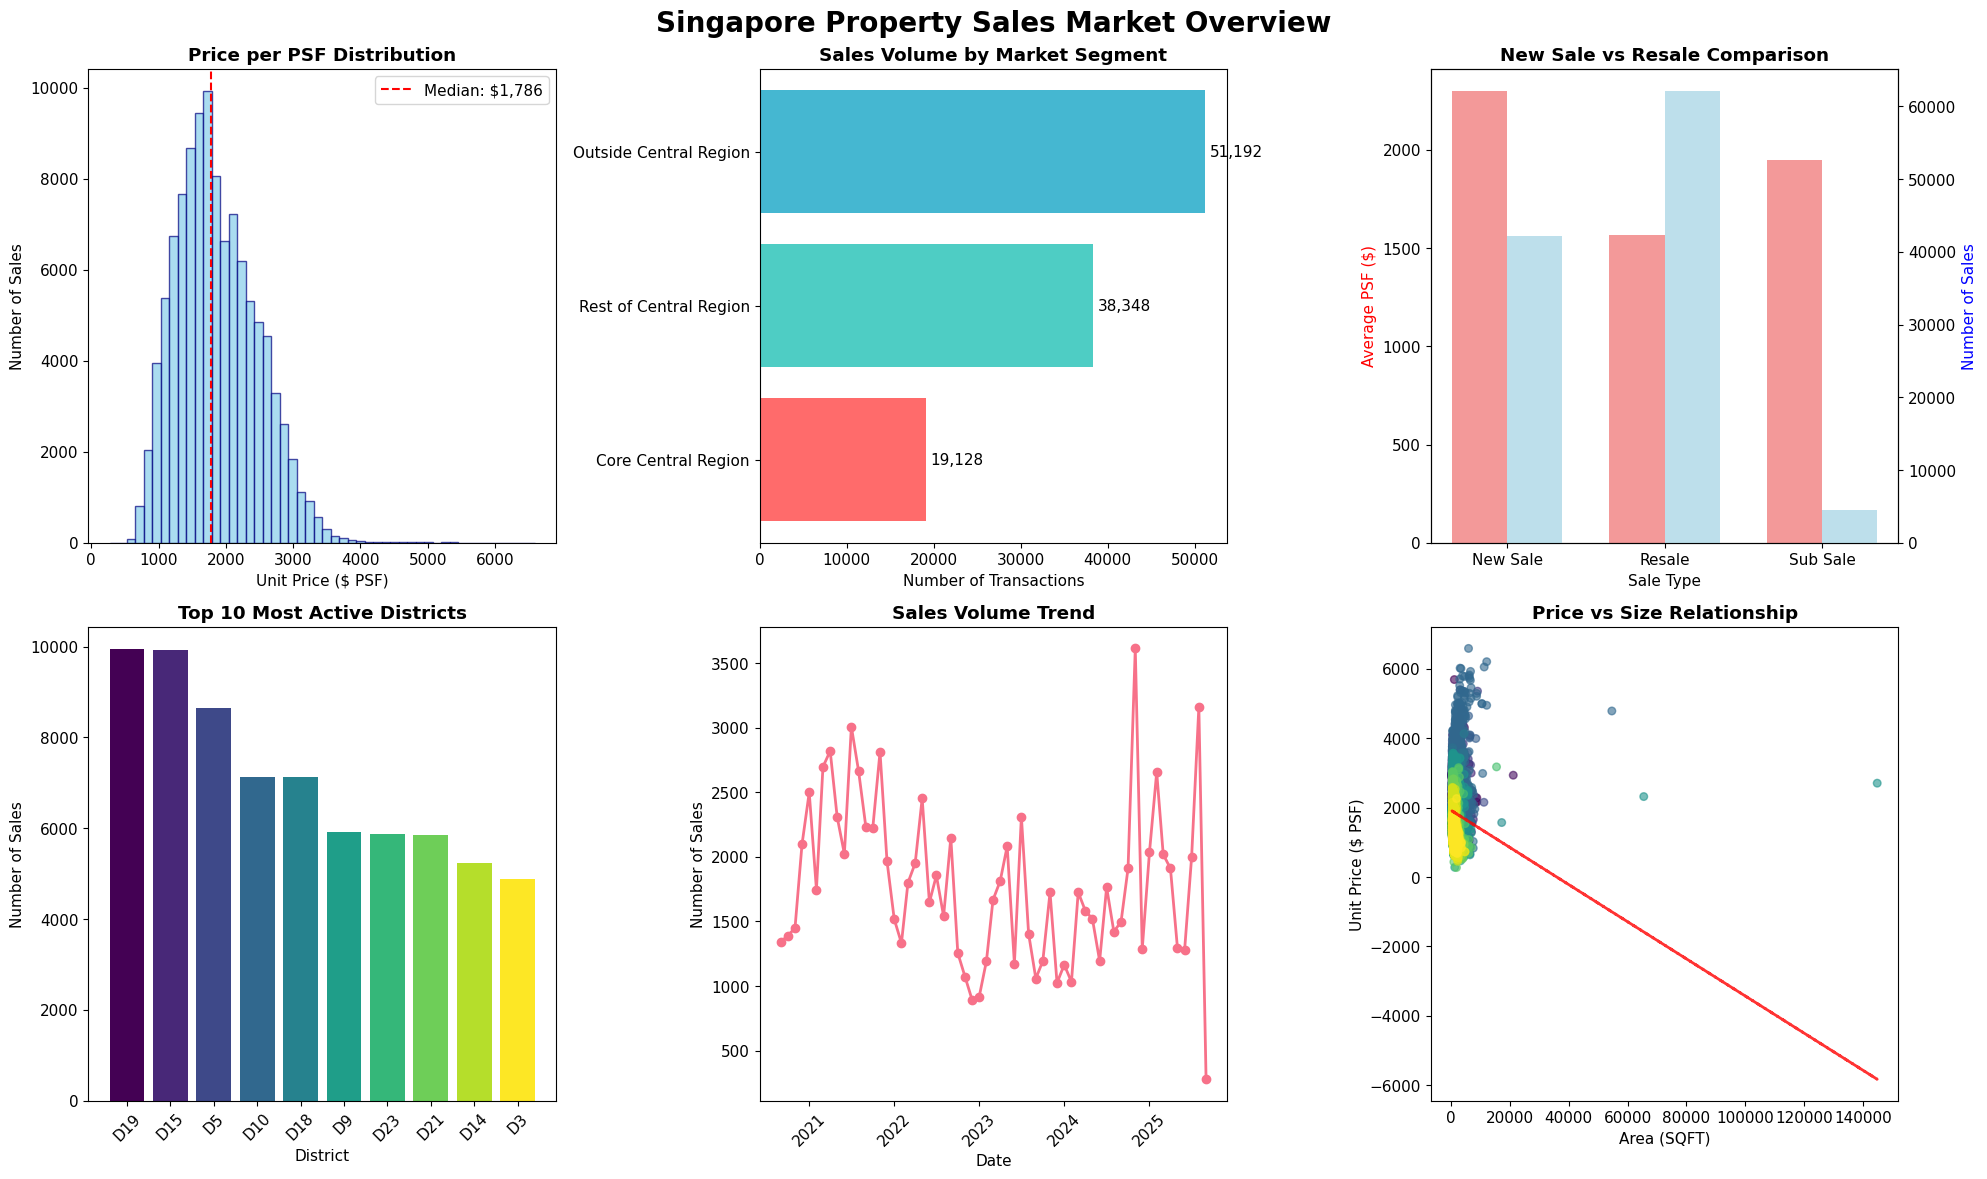

🎯 KEY MARKET INSIGHTS:
• Total transactions analyzed: 108,668
• Average PSF: $1,866
• Median PSF: $1,786
• Most active district: D19.0
• New sale premium: $730 PSF


In [14]:
def create_market_overview(df):
    """Create comprehensive market overview dashboard"""
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Singapore Property Sales Market Overview', fontsize=20, fontweight='bold', y=0.98)
    
    # 1. Price Distribution
    axes[0,0].hist(df['Unit Price ($ PSF)'], bins=50, alpha=0.7, color='skyblue', edgecolor='navy')
    axes[0,0].set_title('Price per PSF Distribution', fontweight='bold')
    axes[0,0].set_xlabel('Unit Price ($ PSF)')
    axes[0,0].set_ylabel('Number of Sales')
    axes[0,0].axvline(df['Unit Price ($ PSF)'].median(), color='red', linestyle='--', 
                      label=f'Median: ${df["Unit Price ($ PSF)"].median():,.0f}')
    axes[0,0].legend()
    
    # 2. Sales by Market Segment
    segment_sales = df.groupby('Market Segment').size().sort_values(ascending=True)
    axes[0,1].barh(segment_sales.index, segment_sales.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    axes[0,1].set_title('Sales Volume by Market Segment', fontweight='bold')
    axes[0,1].set_xlabel('Number of Transactions')
    
    # Add value labels
    for i, v in enumerate(segment_sales.values):
        axes[0,1].text(v + max(segment_sales.values)*0.01, i, f'{v:,}', va='center')
    
    # 3. New vs Resale Sales
    sale_type_data = df.groupby('Type of Sale').agg({
        'Unit Price ($ PSF)': 'mean',
        'Transacted Price ($)': 'count'
    }).round(0)
    
    x = np.arange(len(sale_type_data))
    width = 0.35
    
    ax3_twin = axes[0,2].twinx()
    bars1 = axes[0,2].bar(x - width/2, sale_type_data['Unit Price ($ PSF)'], width, 
                          label='Avg PSF', color='lightcoral', alpha=0.8)
    bars2 = ax3_twin.bar(x + width/2, sale_type_data['Transacted Price ($)'], width, 
                         label='Sales Count', color='lightblue', alpha=0.8)
    
    axes[0,2].set_title('New Sale vs Resale Comparison', fontweight='bold')
    axes[0,2].set_xlabel('Sale Type')
    axes[0,2].set_ylabel('Average PSF ($)', color='red')
    ax3_twin.set_ylabel('Number of Sales', color='blue')
    axes[0,2].set_xticks(x)
    axes[0,2].set_xticklabels(sale_type_data.index)
    
    # 4. Top 10 Most Active Districts
    district_activity = df.groupby('Postal District').size().nlargest(10)
    axes[1,0].bar(range(len(district_activity)), district_activity.values, 
                  color=plt.cm.viridis(np.linspace(0, 1, len(district_activity))))
    axes[1,0].set_title('Top 10 Most Active Districts', fontweight='bold')
    axes[1,0].set_xlabel('District')
    axes[1,0].set_ylabel('Number of Sales')
    axes[1,0].set_xticks(range(len(district_activity)))
    axes[1,0].set_xticklabels([f'D{int(d)}' for d in district_activity.index], rotation=45)
    
    # 5. Sales Trends Over Time
    monthly_sales = df.groupby(['Year', 'Month']).size().reset_index()
    monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(day=1))
    
    axes[1,1].plot(monthly_sales['Date'], monthly_sales[0], marker='o', linewidth=2, markersize=6)
    axes[1,1].set_title('Sales Volume Trend', fontweight='bold')
    axes[1,1].set_xlabel('Date')
    axes[1,1].set_ylabel('Number of Sales')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    # 6. Price vs Size Relationship
    scatter = axes[1,2].scatter(df['Area (SQFT)'], df['Unit Price ($ PSF)'], 
                               c=df['Postal District'], cmap='viridis', alpha=0.6, s=30)
    axes[1,2].set_title('Price vs Size Relationship', fontweight='bold')
    axes[1,2].set_xlabel('Area (SQFT)')
    axes[1,2].set_ylabel('Unit Price ($ PSF)')
    
    # Add trend line
    z = np.polyfit(df['Area (SQFT)'].dropna(), df['Unit Price ($ PSF)'].dropna(), 1)
    p = np.poly1d(z)
    axes[1,2].plot(df['Area (SQFT)'], p(df['Area (SQFT)']), "r--", alpha=0.8, linewidth=2)
    
    plt.tight_layout()
    plt.show()
    
    # Print key insights
    print("🎯 KEY MARKET INSIGHTS:")
    print(f"• Total transactions analyzed: {len(df):,}")
    print(f"• Average PSF: ${df['Unit Price ($ PSF)'].mean():,.0f}")
    print(f"• Median PSF: ${df['Unit Price ($ PSF)'].median():,.0f}")
    print(f"• Most active district: D{df['Postal District'].mode().iloc[0]}")
    print(f"• New sale premium: ${df[df['Type of Sale']=='New Sale']['Unit Price ($ PSF)'].mean() - df[df['Type of Sale']=='Resale']['Unit Price ($ PSF)'].mean():,.0f} PSF")

# Create market overview
create_market_overview(df_clean)

🏘️ Creating district analysis...


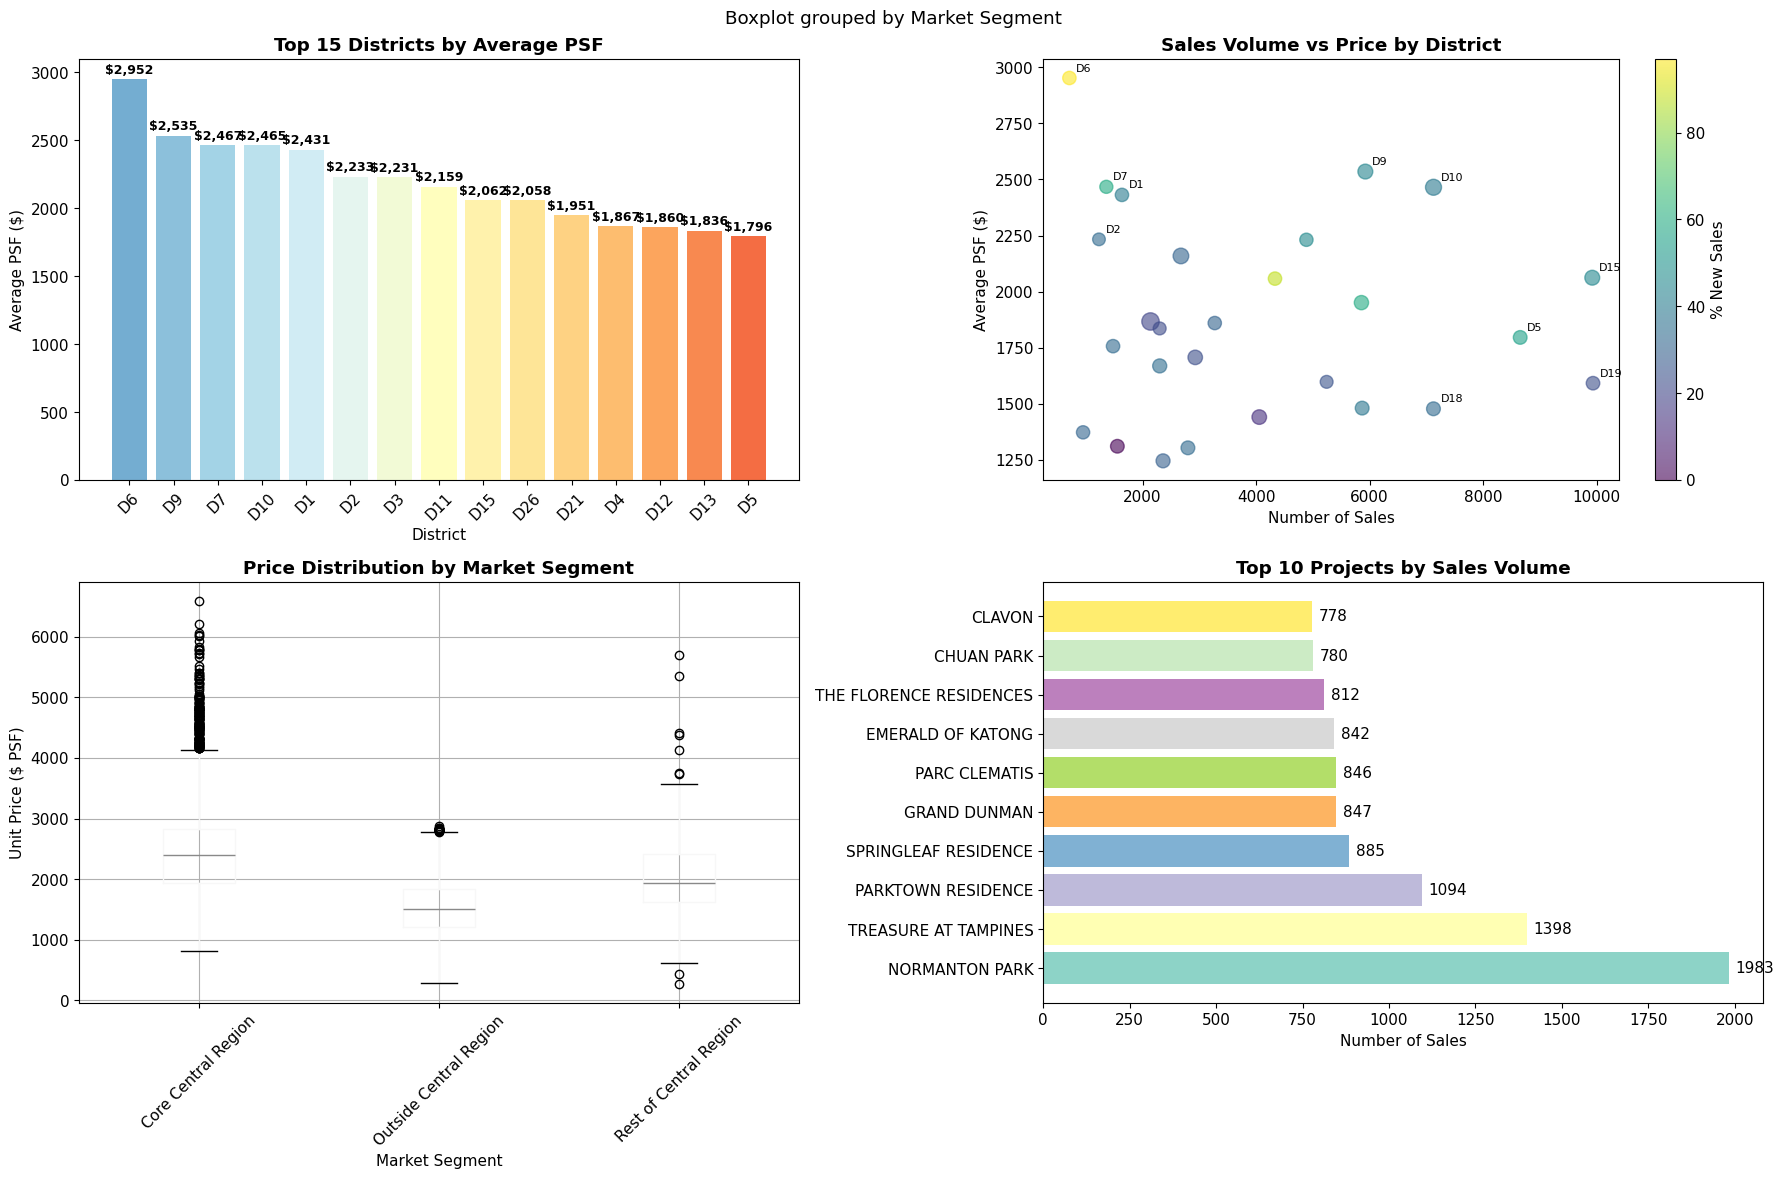

In [16]:
def create_district_analysis(df):
    """Comprehensive district-level analysis"""
    
    # District summary statistics
    district_summary = df.groupby('Postal District').agg({
        'Unit Price ($ PSF)': ['mean', 'median', 'std'],
        'Transacted Price ($)': ['mean', 'count'],
        'Area (SQFT)': 'mean',
        'Type of Sale': lambda x: (x == 'New Sale').sum() / len(x) * 100  # % new sales
    }).round(0)
    
    district_summary.columns = ['PSF_Mean', 'PSF_Median', 'PSF_Std', 'Price_Mean', 'Sales_Count', 'Avg_Size', 'New_Sale_Pct']
    district_summary = district_summary.reset_index()
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('District-Level Sales Analysis', fontsize=18, fontweight='bold')
    
    # 1. District Price Ranking (Top 15)
    top_districts = district_summary.nlargest(15, 'PSF_Mean')
    
    bars = axes[0,0].bar(range(len(top_districts)), top_districts['PSF_Mean'], 
                         color=plt.cm.RdYlBu_r(np.linspace(0.2, 0.8, len(top_districts))))
    axes[0,0].set_title('Top 15 Districts by Average PSF', fontweight='bold')
    axes[0,0].set_xlabel('District')
    axes[0,0].set_ylabel('Average PSF ($)')
    axes[0,0].set_xticks(range(len(top_districts)))
    axes[0,0].set_xticklabels([f'D{int(d)}' for d in top_districts['Postal District']], rotation=45)
    
    # Add value labels on bars
    for bar, value in zip(bars, top_districts['PSF_Mean']):
        axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
                       f'${value:,.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # 2. Sales Volume vs Price Scatter
    scatter = axes[0,1].scatter(district_summary['Sales_Count'], district_summary['PSF_Mean'], 
                               s=district_summary['Avg_Size']/10, alpha=0.6, 
                               c=district_summary['New_Sale_Pct'], cmap='viridis')
    axes[0,1].set_title('Sales Volume vs Price by District', fontweight='bold')
    axes[0,1].set_xlabel('Number of Sales')
    axes[0,1].set_ylabel('Average PSF ($)')
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=axes[0,1])
    cbar.set_label('% New Sales')
    
    # Add district labels for interesting outliers
    for idx, row in district_summary.iterrows():
        if row['Sales_Count'] > district_summary['Sales_Count'].quantile(0.8) or \
           row['PSF_Mean'] > district_summary['PSF_Mean'].quantile(0.8):
            axes[0,1].annotate(f"D{int(row['Postal District'])}", 
                              (row['Sales_Count'], row['PSF_Mean']),
                              xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    # 3. Price Distribution by Market Segment
    df.boxplot(column='Unit Price ($ PSF)', by='Market Segment', ax=axes[1,0])
    axes[1,0].set_title('Price Distribution by Market Segment', fontweight='bold')
    axes[1,0].set_xlabel('Market Segment')
    axes[1,0].set_ylabel('Unit Price ($ PSF)')
    plt.setp(axes[1,0].xaxis.get_majorticklabels(), rotation=45)
    
    # 4. Top Projects by Sales Volume
    top_projects = df.groupby('Project Name').size().nlargest(10)
    
    axes[1,1].barh(range(len(top_projects)), top_projects.values, 
                   color=plt.cm.Set3(np.linspace(0, 1, len(top_projects))))
    axes[1,1].set_title('Top 10 Projects by Sales Volume', fontweight='bold')
    axes[1,1].set_xlabel('Number of Sales')
    axes[1,1].set_yticks(range(len(top_projects)))
    axes[1,1].set_yticklabels([name[:25] + '...' if len(name) > 25 else name 
                              for name in top_projects.index])
    
    # Add value labels
    for i, v in enumerate(top_projects.values):
        axes[1,1].text(v + max(top_projects.values)*0.01, i, f'{v}', va='center')
    
    plt.tight_layout()
    plt.show()
    
    return district_summary

# Create district analysis
print("🏘️ Creating district analysis...")
district_stats = create_district_analysis(df_clean)

💹 Creating pricing trends analysis...


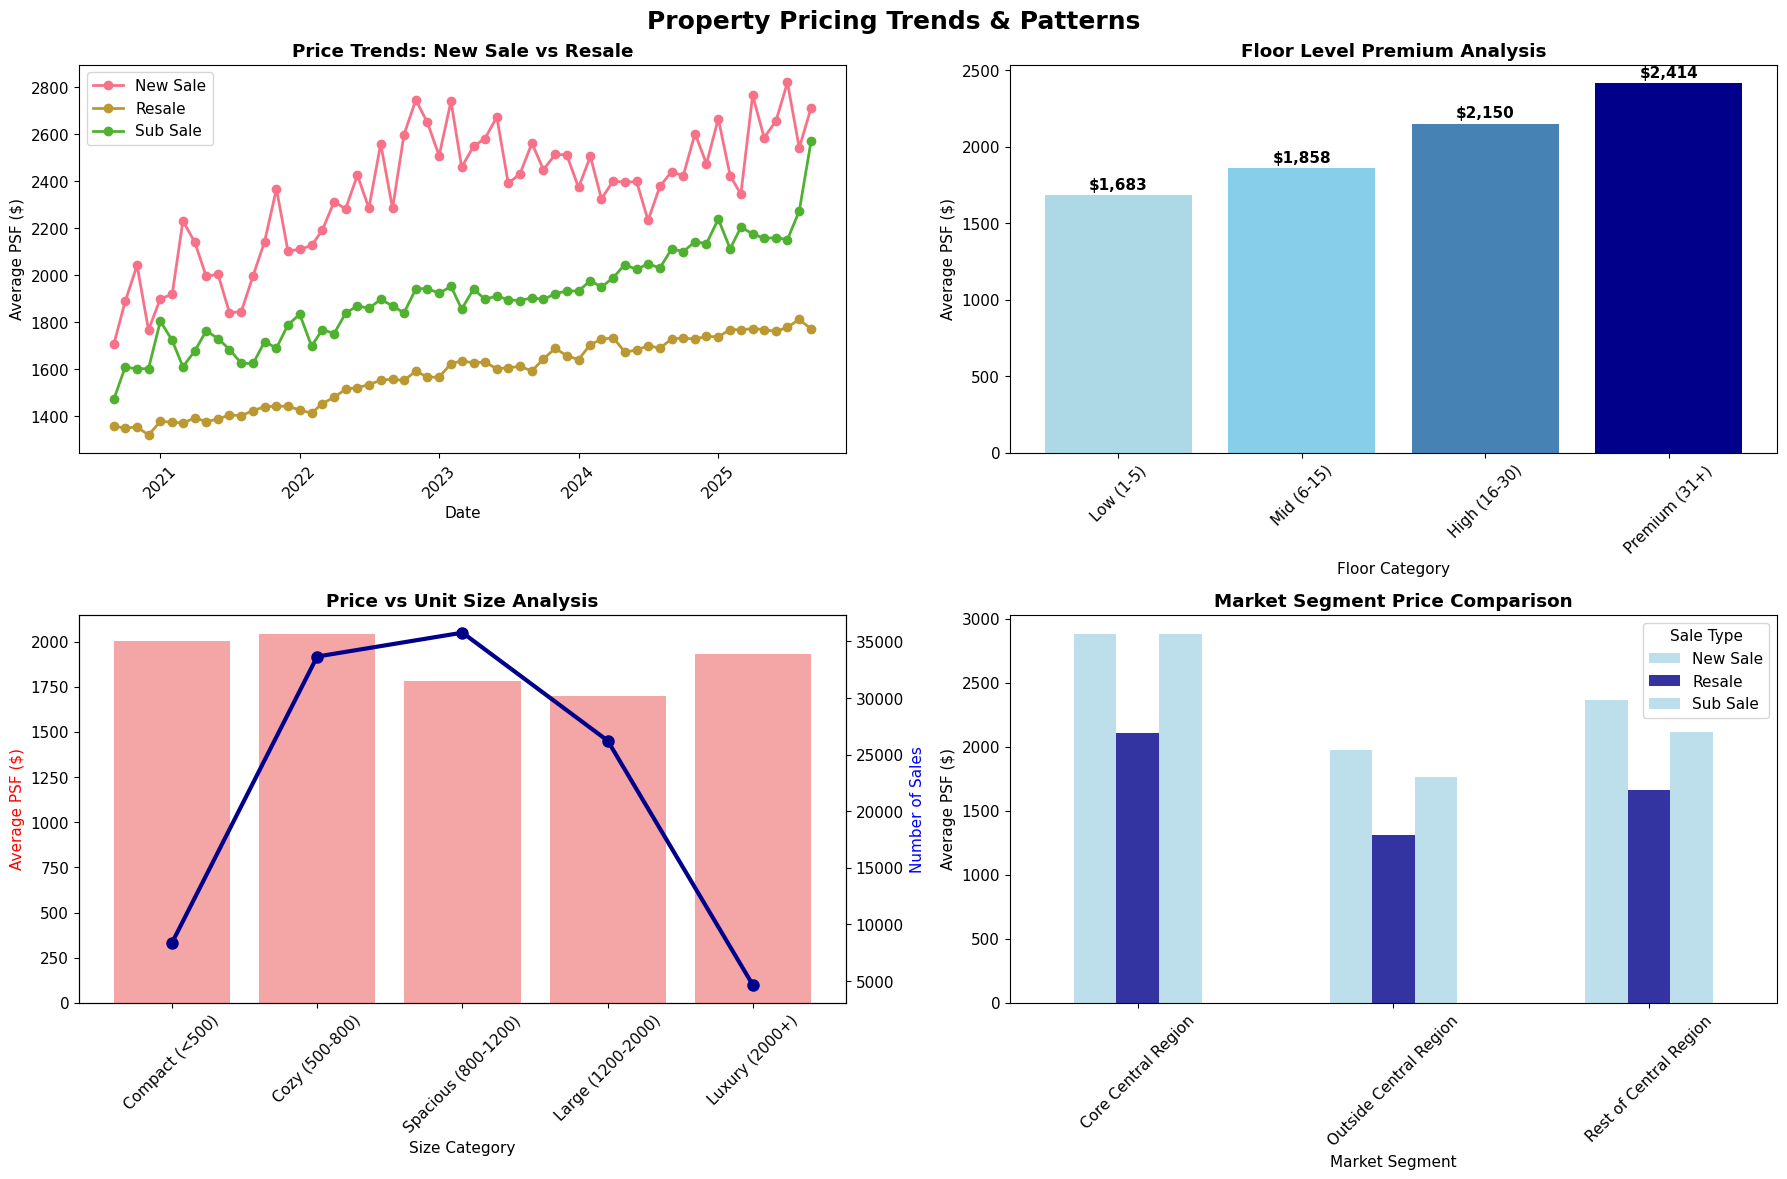

💡 PRICING INSIGHTS:
• New sale premium: $730 PSF (46.5%)
• Floor level premium: $731 PSF (low to premium floors)
• Price range: $274 - $6,593 PSF


In [17]:
def create_pricing_trends(df):
    """Analyze pricing trends and patterns"""
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('Property Pricing Trends & Patterns', fontsize=18, fontweight='bold')
    
    # 1. Price trends over time by sale type
    monthly_trends = df.groupby(['Year', 'Month', 'Type of Sale'])['Unit Price ($ PSF)'].mean().reset_index()
    monthly_trends['Date'] = pd.to_datetime(monthly_trends[['Year', 'Month']].assign(day=1))
    
    for sale_type in monthly_trends['Type of Sale'].unique():
        data = monthly_trends[monthly_trends['Type of Sale'] == sale_type]
        axes[0,0].plot(data['Date'], data['Unit Price ($ PSF)'], 
                       marker='o', linewidth=2, label=sale_type, markersize=6)
    
    axes[0,0].set_title('Price Trends: New Sale vs Resale', fontweight='bold')
    axes[0,0].set_xlabel('Date')
    axes[0,0].set_ylabel('Average PSF ($)')
    axes[0,0].legend()
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 2. Floor level premium analysis
    floor_price = df.groupby('Floor_Category')['Unit Price ($ PSF)'].mean().sort_index()
    
    bars = axes[0,1].bar(range(len(floor_price)), floor_price.values, 
                         color=['lightblue', 'skyblue', 'steelblue', 'darkblue'])
    axes[0,1].set_title('Floor Level Premium Analysis', fontweight='bold')
    axes[0,1].set_xlabel('Floor Category')
    axes[0,1].set_ylabel('Average PSF ($)')
    axes[0,1].set_xticks(range(len(floor_price)))
    axes[0,1].set_xticklabels(floor_price.index, rotation=45)
    
    # Add value labels
    for bar, value in zip(bars, floor_price.values):
        axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
                       f'${value:,.0f}', ha='center', va='bottom', fontweight='bold')
    
    # 3. Size vs Price Analysis
    size_price = df.groupby('Size_Category')['Unit Price ($ PSF)'].agg(['mean', 'count']).reset_index()
    
    ax3_twin = axes[1,0].twinx()
    bars1 = axes[1,0].bar(range(len(size_price)), size_price['mean'], 
                          alpha=0.7, color='lightcoral', label='Avg PSF')
    line1 = ax3_twin.plot(range(len(size_price)), size_price['count'], 
                          color='darkblue', marker='o', linewidth=3, markersize=8, label='Sales Count')
    
    axes[1,0].set_title('Price vs Unit Size Analysis', fontweight='bold')
    axes[1,0].set_xlabel('Size Category')
    axes[1,0].set_ylabel('Average PSF ($)', color='red')
    ax3_twin.set_ylabel('Number of Sales', color='blue')
    axes[1,0].set_xticks(range(len(size_price)))
    axes[1,0].set_xticklabels(size_price['Size_Category'], rotation=45)
    
    # 4. Premium Analysis by Market Segment
    segment_analysis = df.groupby(['Market Segment', 'Type of Sale'])['Unit Price ($ PSF)'].mean().unstack()
    
    segment_analysis.plot(kind='bar', ax=axes[1,1], color=['lightblue', 'darkblue'], alpha=0.8)
    axes[1,1].set_title('Market Segment Price Comparison', fontweight='bold')
    axes[1,1].set_xlabel('Market Segment')
    axes[1,1].set_ylabel('Average PSF ($)')
    axes[1,1].legend(title='Sale Type')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate insights
    new_premium = df[df['Type of Sale']=='New Sale']['Unit Price ($ PSF)'].mean() - \
                  df[df['Type of Sale']=='Resale']['Unit Price ($ PSF)'].mean()
    
    floor_premium = floor_price.iloc[-1] - floor_price.iloc[0] if len(floor_price) > 1 else 0
    
    print("💡 PRICING INSIGHTS:")
    print(f"• New sale premium: ${new_premium:,.0f} PSF ({new_premium/df[df['Type of Sale']=='Resale']['Unit Price ($ PSF)'].mean()*100:.1f}%)")
    print(f"• Floor level premium: ${floor_premium:,.0f} PSF (low to premium floors)")
    print(f"• Price range: ${df['Unit Price ($ PSF)'].min():,.0f} - ${df['Unit Price ($ PSF)'].max():,.0f} PSF")

# Create pricing trends analysis
print("💹 Creating pricing trends analysis...")
create_pricing_trends(df_clean)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import networkx as nx
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set styling
plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (15, 8)

def prepare_amenity_data(df):
    """Prepare amenity and facilities data for analysis"""
    
    df_amenity = df.copy()
    
    # Clean and extract MRT stations
    df_amenity['MRT_Stations'] = df_amenity['Nearest MRT Stations'].fillna('')
    df_amenity['MRT_Count'] = df_amenity['MRT_Stations'].apply(
        lambda x: len([s.strip() for s in str(x).split(';') if s.strip()]) if pd.notna(x) and x != '' else 0
    )
    
    # Extract individual MRT stations
    all_mrt = []
    for stations in df_amenity['MRT_Stations']:
        if pd.notna(stations) and stations != '':
            mrt_list = [s.strip() for s in str(stations).split(';') if s.strip()]
            all_mrt.extend(mrt_list)
    
    df_amenity['MRT_List'] = df_amenity['MRT_Stations'].apply(
        lambda x: [s.strip() for s in str(x).split(';') if s.strip()] if pd.notna(x) and x != '' else []
    )
    
    # Clean hawker centers
    df_amenity['Hawker_Centers'] = df_amenity['Nearby Hawker Centers'].fillna('')
    df_amenity['Hawker_Count'] = df_amenity['Hawker_Centers'].apply(
        lambda x: len([s.strip() for s in str(x).split(';') if s.strip()]) if pd.notna(x) and x != '' else 0
    )
    
    # Clean shopping malls
    df_amenity['Shopping_Malls'] = df_amenity['Shopping Malls Within Radius of 1km'].fillna('')
    df_amenity['Mall_Count'] = df_amenity['Shopping_Malls'].apply(
        lambda x: len([s.strip() for s in str(x).split(';') if s.strip()]) if pd.notna(x) and x != '' else 0
    )
    
    # Create amenity score
    df_amenity['Amenity_Score'] = (
        df_amenity['MRT_Count'] * 3 +  # MRT stations weighted higher
        df_amenity['Hawker_Count'] * 2 +  # Hawker centers medium weight
        df_amenity['Mall_Count'] * 2.5    # Shopping malls medium-high weight
    )
    
    # Create connectivity categories
    df_amenity['Connectivity_Level'] = pd.cut(
        df_amenity['MRT_Count'], 
        bins=[-1, 0, 2, 4, 20], 
        labels=['No MRT', 'Limited (1-2)', 'Good (3-4)', 'Excellent (5+)']
    )
    
    # Create amenity richness categories
    df_amenity['Amenity_Richness'] = pd.cut(
        df_amenity['Amenity_Score'],
        bins=[-1, 0, 5, 10, 50],
        labels=['Minimal', 'Basic', 'Good', 'Excellent']
    )
    
    return df_amenity, all_mrt

# Prepare data
df_amenity, all_mrt_stations = prepare_amenity_data(df)
print("✅ Amenity data prepared for analysis")

✅ Amenity data prepared for analysis


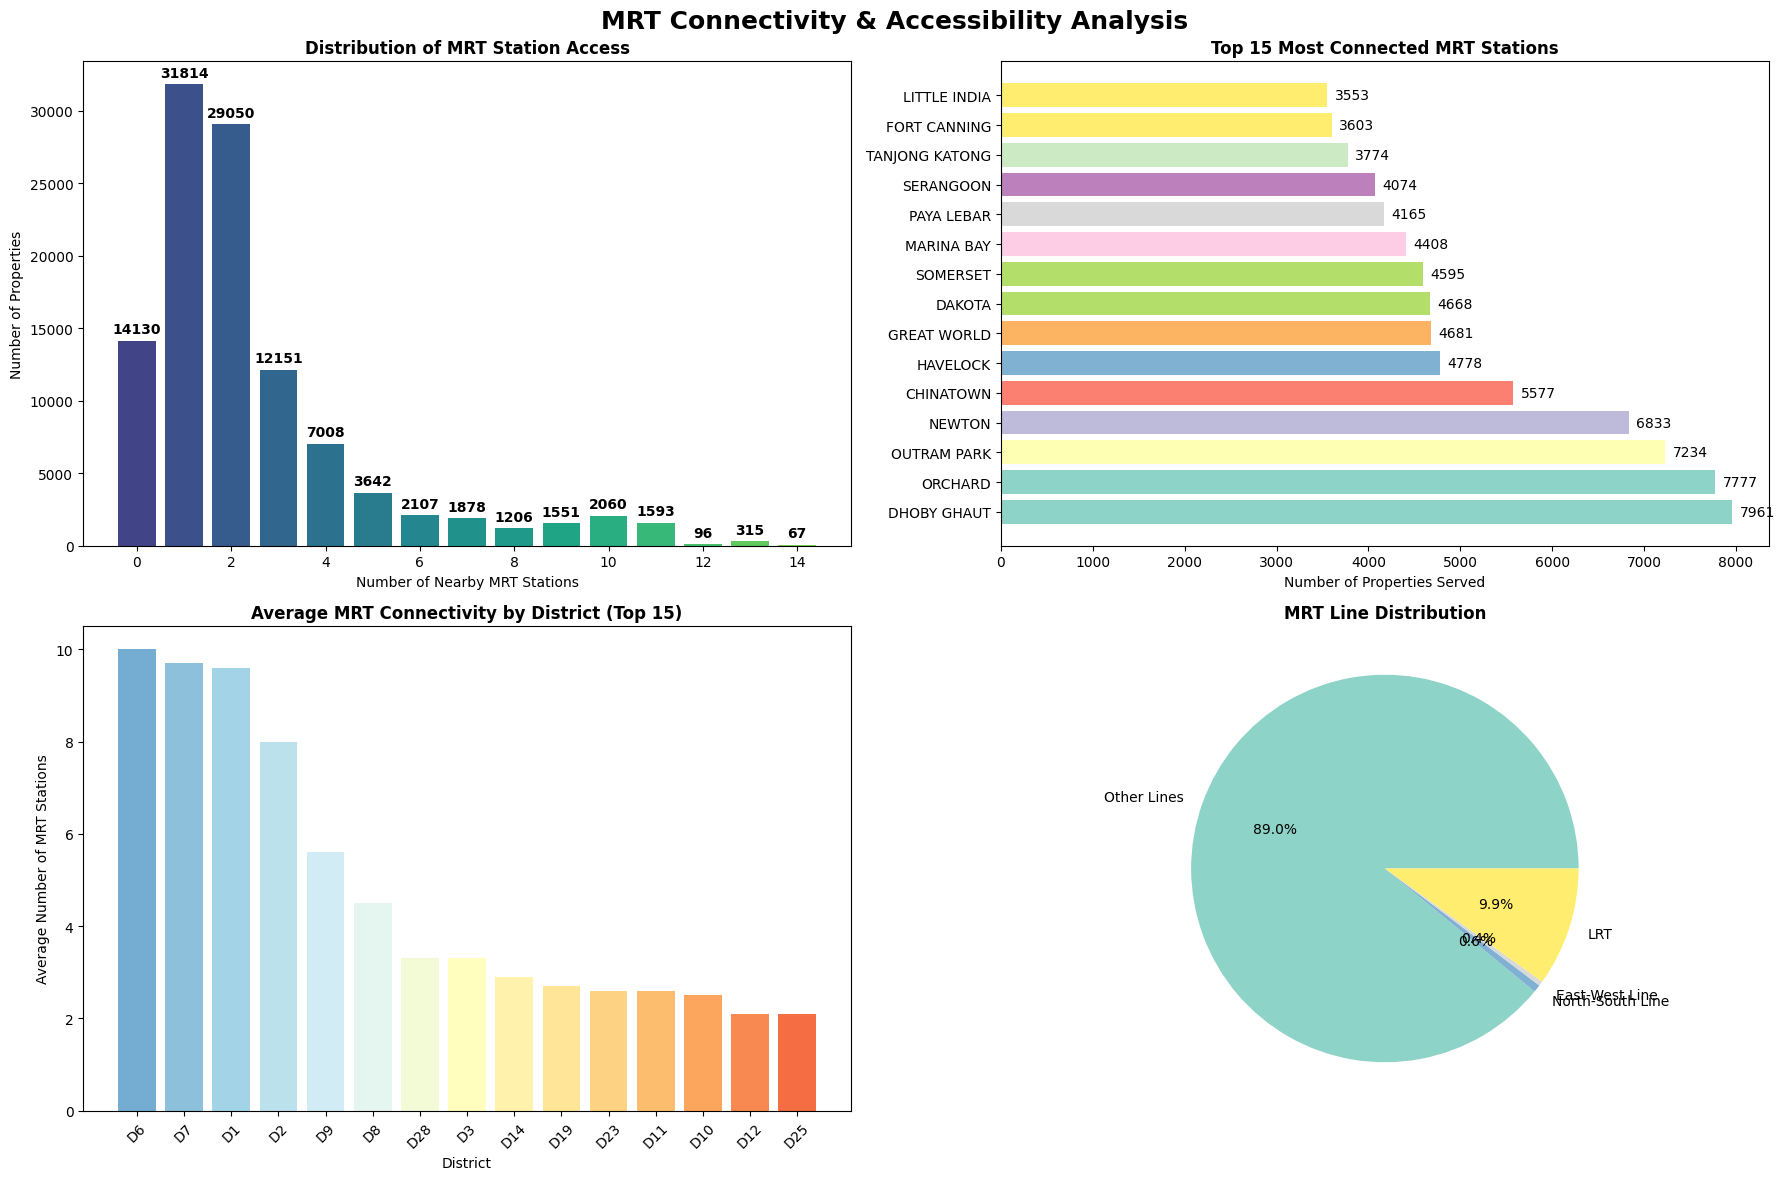

🚇 MRT CONNECTIVITY INSIGHTS:
• Average MRT stations per property: 2.5
• Properties with no MRT access: 14130 (13.0%)
• Properties with excellent connectivity (5+ stations): 14515
• Most connected station: DHOBY GHAUT MRT STATION (7961 properties)


In [21]:
def analyze_mrt_connectivity(df):
    """Comprehensive MRT connectivity analysis"""
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('MRT Connectivity & Accessibility Analysis', fontsize=18, fontweight='bold')
    
    # 1. MRT Station Count Distribution
    mrt_counts = df['MRT_Count'].value_counts().sort_index()
    
    bars = axes[0,0].bar(mrt_counts.index, mrt_counts.values, 
                         color=plt.cm.viridis(np.linspace(0.2, 0.8, len(mrt_counts))))
    axes[0,0].set_title('Distribution of MRT Station Access', fontweight='bold')
    axes[0,0].set_xlabel('Number of Nearby MRT Stations')
    axes[0,0].set_ylabel('Number of Properties')
    
    # Add value labels
    for bar, value in zip(bars, mrt_counts.values):
        if value > 0:
            axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(mrt_counts.values)*0.01,
                           f'{value}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Most Connected MRT Stations
    mrt_frequency = Counter(all_mrt_stations)
    top_mrt = dict(mrt_frequency.most_common(15))
    
    axes[0,1].barh(range(len(top_mrt)), list(top_mrt.values()), 
                   color=plt.cm.Set3(np.linspace(0, 1, len(top_mrt))))
    axes[0,1].set_title('Top 15 Most Connected MRT Stations', fontweight='bold')
    axes[0,1].set_xlabel('Number of Properties Served')
    axes[0,1].set_yticks(range(len(top_mrt)))
    axes[0,1].set_yticklabels([name.replace(' MRT STATION', '').replace(' STATION', '') 
                              for name in top_mrt.keys()])
    
    # Add value labels
    for i, v in enumerate(top_mrt.values()):
        axes[0,1].text(v + max(top_mrt.values())*0.01, i, f'{v}', va='center')
    
    # 3. Connectivity by District
    district_mrt = df.groupby('Postal District')['MRT_Count'].agg(['mean', 'max', 'count']).round(1)
    district_mrt = district_mrt[district_mrt['count'] >= 5].sort_values('mean', ascending=False).head(15)
    
    bars = axes[1,0].bar(range(len(district_mrt)), district_mrt['mean'], 
                         color=plt.cm.RdYlBu_r(np.linspace(0.2, 0.8, len(district_mrt))))
    axes[1,0].set_title('Average MRT Connectivity by District (Top 15)', fontweight='bold')
    axes[1,0].set_xlabel('District')
    axes[1,0].set_ylabel('Average Number of MRT Stations')
    axes[1,0].set_xticks(range(len(district_mrt)))
    axes[1,0].set_xticklabels([f'D{int(d)}' for d in district_mrt.index], rotation=45)
    
    # 4. MRT Lines Analysis (extract line information)
    mrt_lines = []
    for stations in df['MRT_List']:
        for station in stations:
            # Extract potential line information (this is simplified)
            if 'LRT' in station:
                mrt_lines.append('LRT')
            elif any(word in station.upper() for word in ['NORTH', 'SOUTH', 'EAST', 'WEST']):
                if 'NORTH' in station.upper():
                    mrt_lines.append('North-South Line')
                elif 'EAST' in station.upper():
                    mrt_lines.append('East-West Line')
                # Add more line detection logic as needed
            else:
                mrt_lines.append('Other Lines')
    
    line_counts = Counter(mrt_lines)
    
    if line_counts:
        axes[1,1].pie(line_counts.values(), labels=line_counts.keys(), autopct='%1.1f%%',
                      colors=plt.cm.Set3(np.linspace(0, 1, len(line_counts))))
        axes[1,1].set_title('MRT Line Distribution', fontweight='bold')
    else:
        axes[1,1].text(0.5, 0.5, 'MRT Line data\nnot available', ha='center', va='center',
                       transform=axes[1,1].transAxes, fontsize=14)
        axes[1,1].set_title('MRT Line Distribution', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print insights
    print("🚇 MRT CONNECTIVITY INSIGHTS:")
    print(f"• Average MRT stations per property: {df['MRT_Count'].mean():.1f}")
    print(f"• Properties with no MRT access: {(df['MRT_Count'] == 0).sum()} ({(df['MRT_Count'] == 0).mean()*100:.1f}%)")
    print(f"• Properties with excellent connectivity (5+ stations): {(df['MRT_Count'] >= 5).sum()}")
    print(f"• Most connected station: {mrt_frequency.most_common(1)[0][0]} ({mrt_frequency.most_common(1)[0][1]} properties)")

# Run MRT analysis
analyze_mrt_connectivity(df_amenity)

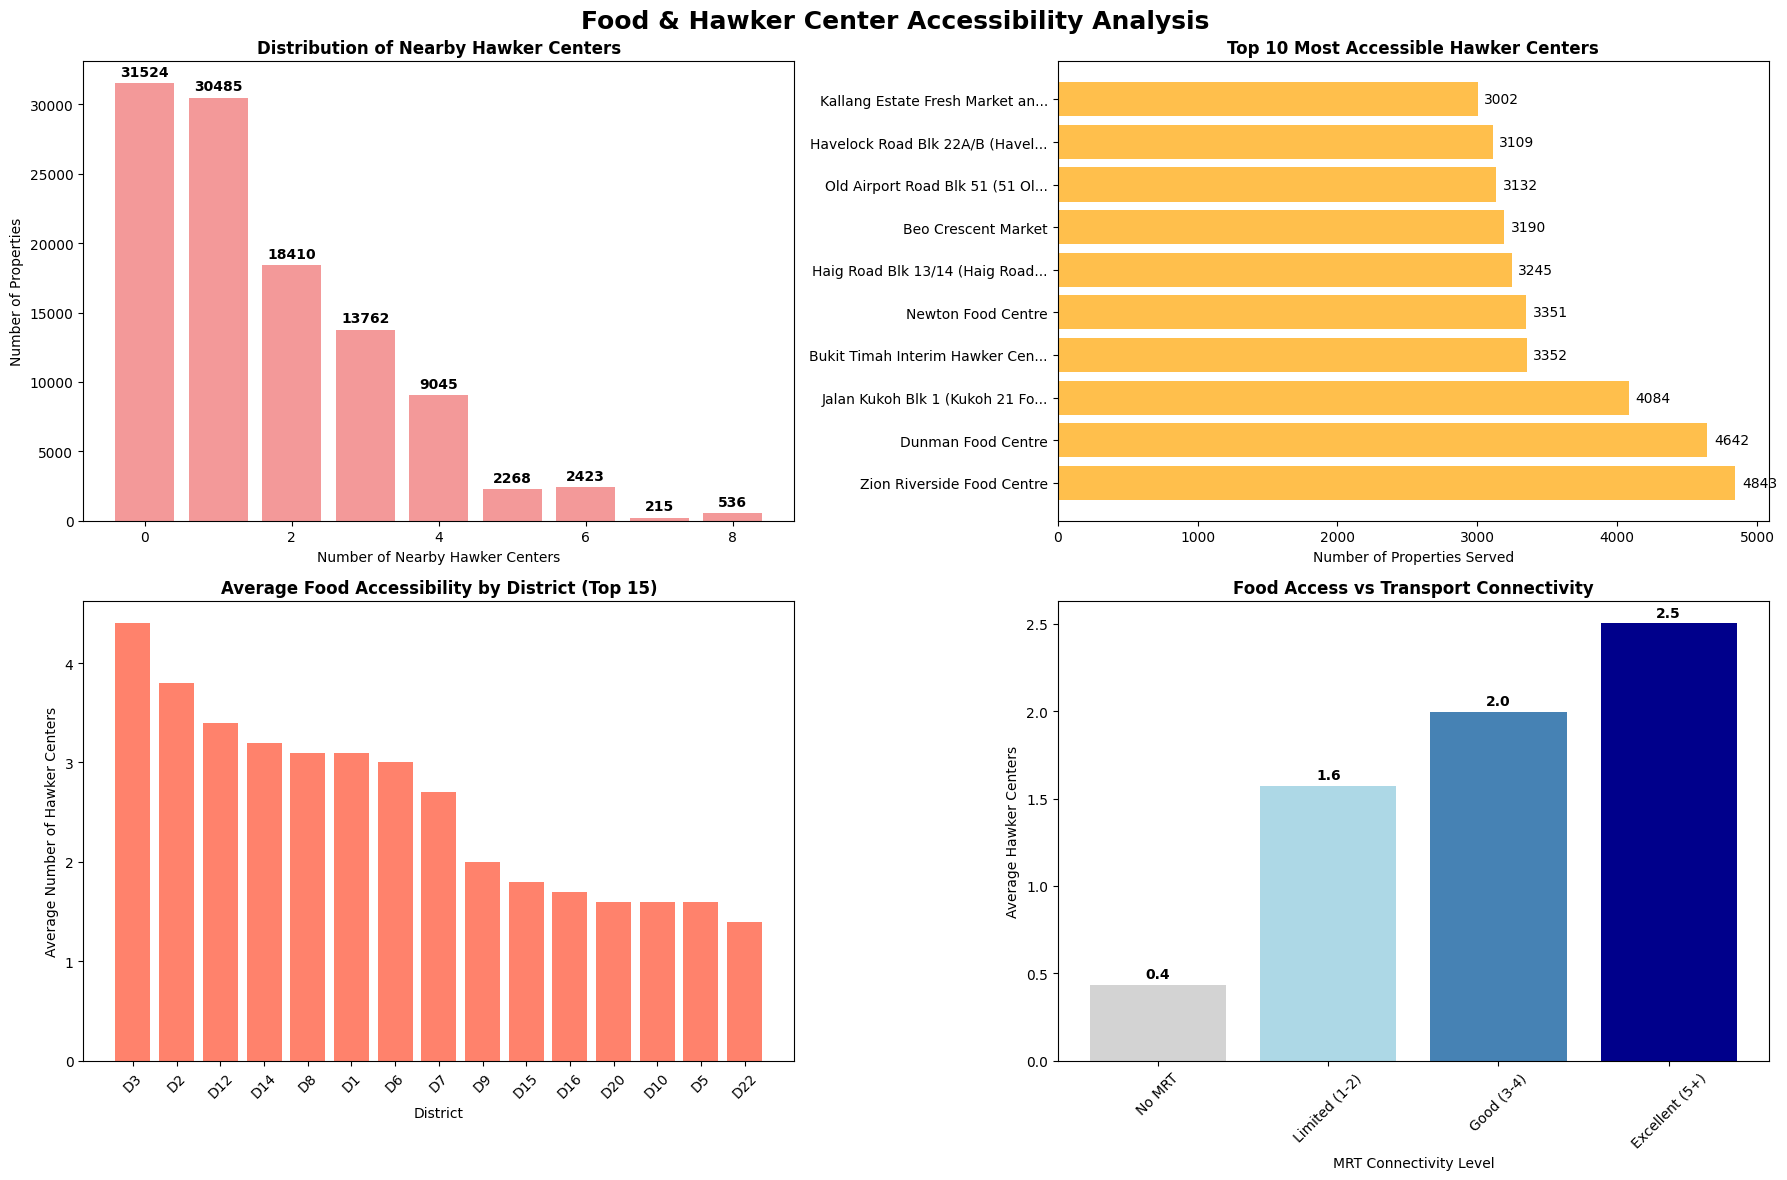

🍜 FOOD ACCESSIBILITY INSIGHTS:
• Average hawker centers per property: 1.6
• Properties with no hawker access: 31524 (29.0%)
• Most accessible hawker center: Zion Riverside Food Centre...
• Best food district: D3.0 (4.4 avg hawkers)


In [22]:
def analyze_food_accessibility(df):
    """Analyze hawker center and food accessibility"""
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('Food & Hawker Center Accessibility Analysis', fontsize=18, fontweight='bold')
    
    # 1. Hawker Center Count Distribution
    hawker_counts = df['Hawker_Count'].value_counts().sort_index()
    
    bars = axes[0,0].bar(hawker_counts.index, hawker_counts.values, 
                         color='lightcoral', alpha=0.8)
    axes[0,0].set_title('Distribution of Nearby Hawker Centers', fontweight='bold')
    axes[0,0].set_xlabel('Number of Nearby Hawker Centers')
    axes[0,0].set_ylabel('Number of Properties')
    
    # Add value labels
    for bar, value in zip(bars, hawker_counts.values):
        if value > 0:
            axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(hawker_counts.values)*0.01,
                           f'{value}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Extract and analyze hawker center names
    all_hawkers = []
    for hawkers in df['Hawker_Centers']:
        if pd.notna(hawkers) and hawkers != '':
            hawker_list = [h.strip() for h in str(hawkers).split(';') if h.strip()]
            all_hawkers.extend(hawker_list)
    
    if all_hawkers:
        hawker_frequency = Counter(all_hawkers)
        top_hawkers = dict(hawker_frequency.most_common(10))
        
        axes[0,1].barh(range(len(top_hawkers)), list(top_hawkers.values()), 
                       color='orange', alpha=0.7)
        axes[0,1].set_title('Top 10 Most Accessible Hawker Centers', fontweight='bold')
        axes[0,1].set_xlabel('Number of Properties Served')
        axes[0,1].set_yticks(range(len(top_hawkers)))
        axes[0,1].set_yticklabels([name[:30] + '...' if len(name) > 30 else name 
                                  for name in top_hawkers.keys()])
        
        # Add value labels
        for i, v in enumerate(top_hawkers.values()):
            axes[0,1].text(v + max(top_hawkers.values())*0.01, i, f'{v}', va='center')
    else:
        axes[0,1].text(0.5, 0.5, 'No hawker center\ndata available', ha='center', va='center',
                       transform=axes[0,1].transAxes, fontsize=14)
        axes[0,1].set_title('Top Hawker Centers', fontweight='bold')
    
    # 3. Food Accessibility by District
    district_food = df.groupby('Postal District')['Hawker_Count'].agg(['mean', 'count']).round(1)
    district_food = district_food[district_food['count'] >= 5].sort_values('mean', ascending=False).head(15)
    
    bars = axes[1,0].bar(range(len(district_food)), district_food['mean'], 
                         color='tomato', alpha=0.8)
    axes[1,0].set_title('Average Food Accessibility by District (Top 15)', fontweight='bold')
    axes[1,0].set_xlabel('District')
    axes[1,0].set_ylabel('Average Number of Hawker Centers')
    axes[1,0].set_xticks(range(len(district_food)))
    axes[1,0].set_xticklabels([f'D{int(d)}' for d in district_food.index], rotation=45)
    
    # 4. Combined Food & Transport Access
    transport_food = df.groupby(['Connectivity_Level'])['Hawker_Count'].mean()
    
    bars = axes[1,1].bar(range(len(transport_food)), transport_food.values, 
                         color=['lightgray', 'lightblue', 'steelblue', 'darkblue'])
    axes[1,1].set_title('Food Access vs Transport Connectivity', fontweight='bold')
    axes[1,1].set_xlabel('MRT Connectivity Level')
    axes[1,1].set_ylabel('Average Hawker Centers')
    axes[1,1].set_xticks(range(len(transport_food)))
    axes[1,1].set_xticklabels(transport_food.index, rotation=45)
    
    # Add value labels
    for bar, value in zip(bars, transport_food.values):
        axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                       f'{value:.1f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print insights
    print("🍜 FOOD ACCESSIBILITY INSIGHTS:")
    print(f"• Average hawker centers per property: {df['Hawker_Count'].mean():.1f}")
    print(f"• Properties with no hawker access: {(df['Hawker_Count'] == 0).sum()} ({(df['Hawker_Count'] == 0).mean()*100:.1f}%)")
    if all_hawkers:
        print(f"• Most accessible hawker center: {hawker_frequency.most_common(1)[0][0][:40]}...")
    print(f"• Best food district: D{district_food.index[0]} ({district_food.iloc[0]['mean']:.1f} avg hawkers)")

# Run food accessibility analysis
analyze_food_accessibility(df_amenity)

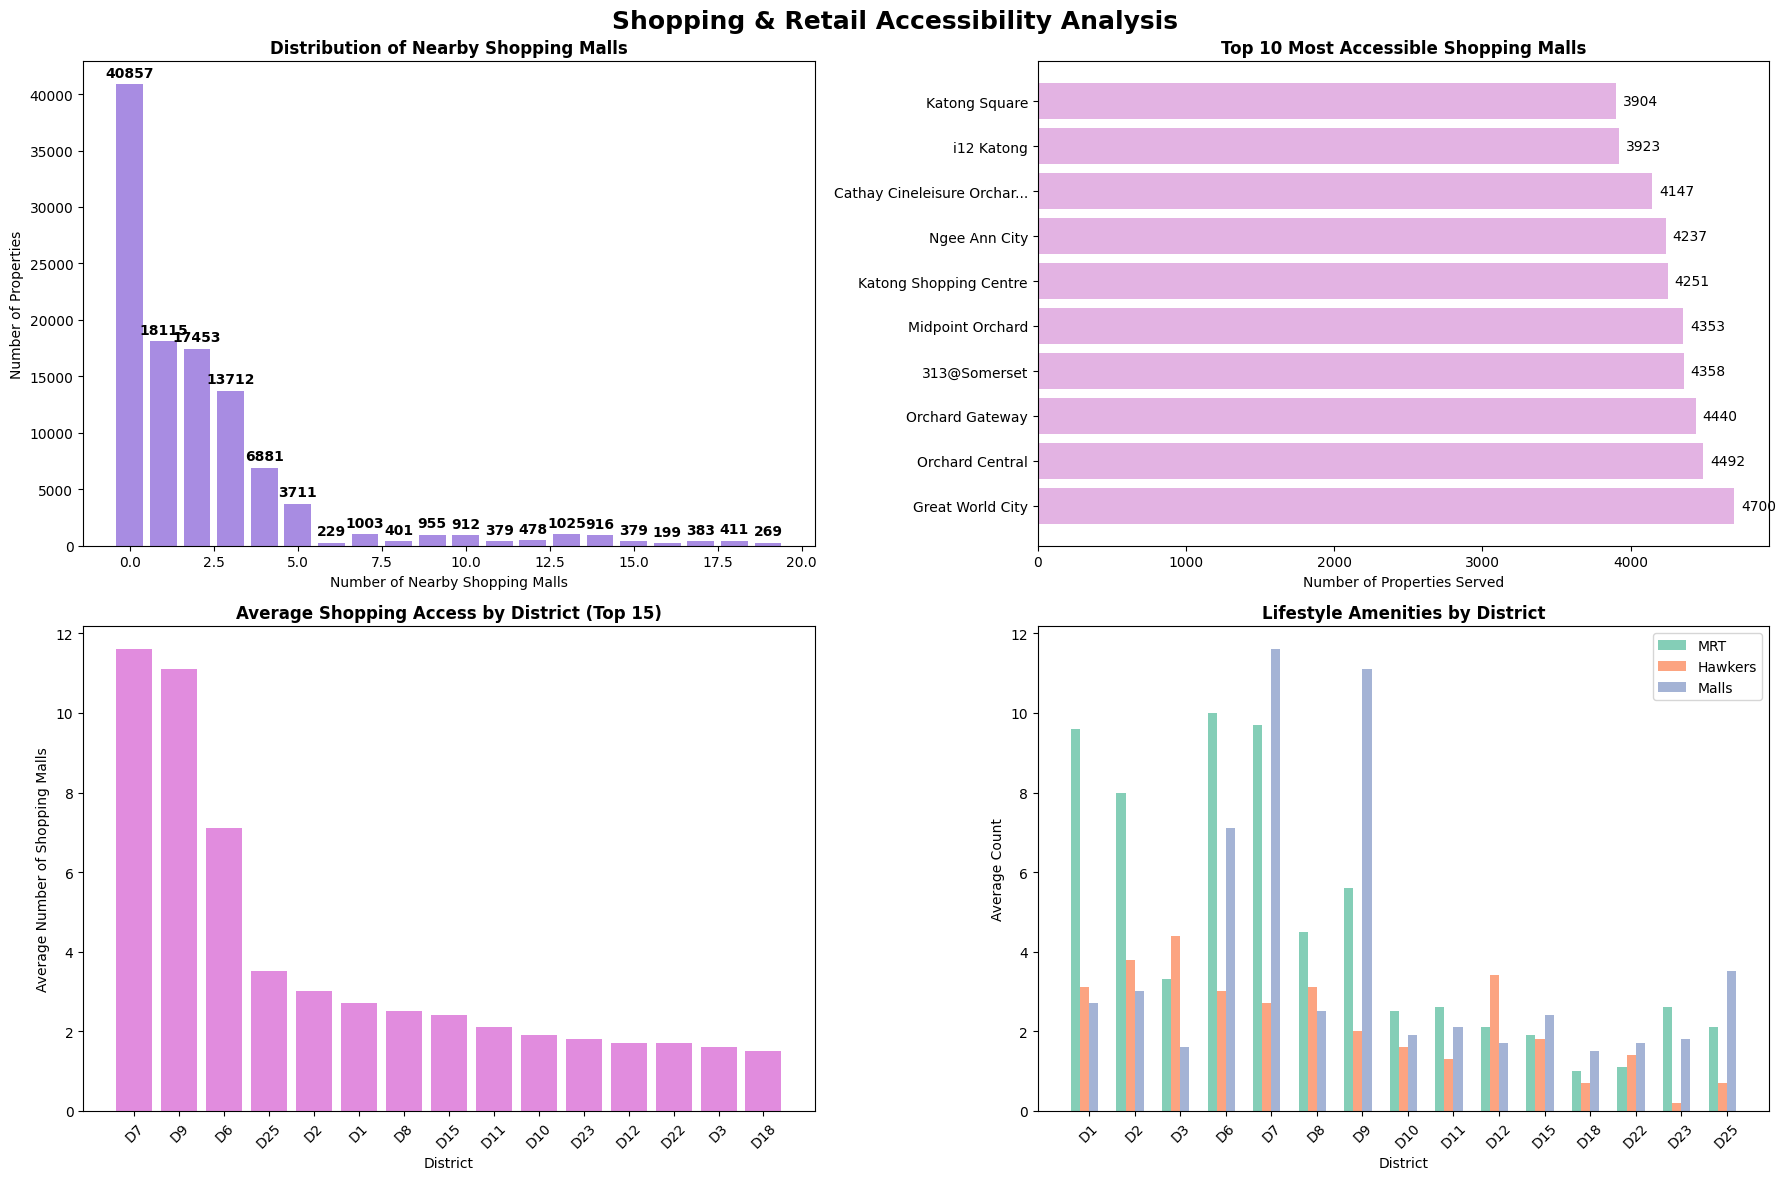

🛍️ SHOPPING ACCESSIBILITY INSIGHTS:
• Average shopping malls per property: 2.1
• Properties with no mall access: 40857 (37.6%)
• Most accessible mall: Great World City...
• Best shopping district: D7.0 (11.6 avg malls)


In [23]:
def analyze_shopping_accessibility(df):
    """Analyze shopping mall and retail accessibility"""
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('Shopping & Retail Accessibility Analysis', fontsize=18, fontweight='bold')
    
    # 1. Shopping Mall Count Distribution
    mall_counts = df['Mall_Count'].value_counts().sort_index()
    
    bars = axes[0,0].bar(mall_counts.index, mall_counts.values, 
                         color='mediumpurple', alpha=0.8)
    axes[0,0].set_title('Distribution of Nearby Shopping Malls', fontweight='bold')
    axes[0,0].set_xlabel('Number of Nearby Shopping Malls')
    axes[0,0].set_ylabel('Number of Properties')
    
    # Add value labels
    for bar, value in zip(bars, mall_counts.values):
        if value > 0:
            axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(mall_counts.values)*0.01,
                           f'{value}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Popular shopping malls
    all_malls = []
    for malls in df['Shopping_Malls']:
        if pd.notna(malls) and malls != '':
            mall_list = [m.strip() for m in str(malls).split(';') if m.strip()]
            all_malls.extend(mall_list)
    
    if all_malls:
        mall_frequency = Counter(all_malls)
        top_malls = dict(mall_frequency.most_common(10))
        
        axes[0,1].barh(range(len(top_malls)), list(top_malls.values()), 
                       color='plum', alpha=0.8)
        axes[0,1].set_title('Top 10 Most Accessible Shopping Malls', fontweight='bold')
        axes[0,1].set_xlabel('Number of Properties Served')
        axes[0,1].set_yticks(range(len(top_malls)))
        axes[0,1].set_yticklabels([name[:25] + '...' if len(name) > 25 else name 
                                  for name in top_malls.keys()])
        
        # Add value labels
        for i, v in enumerate(top_malls.values()):
            axes[0,1].text(v + max(top_malls.values())*0.01, i, f'{v}', va='center')
    else:
        axes[0,1].text(0.5, 0.5, 'No shopping mall\ndata available', ha='center', va='center',
                       transform=axes[0,1].transAxes, fontsize=14)
        axes[0,1].set_title('Top Shopping Malls', fontweight='bold')
    
    # 3. Shopping Access by District
    district_shopping = df.groupby('Postal District')['Mall_Count'].agg(['mean', 'count']).round(1)
    district_shopping = district_shopping[district_shopping['count'] >= 5].sort_values('mean', ascending=False).head(15)
    
    bars = axes[1,0].bar(range(len(district_shopping)), district_shopping['mean'], 
                         color='orchid', alpha=0.8)
    axes[1,0].set_title('Average Shopping Access by District (Top 15)', fontweight='bold')
    axes[1,0].set_xlabel('District')
    axes[1,0].set_ylabel('Average Number of Shopping Malls')
    axes[1,0].set_xticks(range(len(district_shopping)))
    axes[1,0].set_xticklabels([f'D{int(d)}' for d in district_shopping.index], rotation=45)
    
    # 4. Lifestyle Score (combination of amenities)
    lifestyle_data = df.groupby('Postal District').agg({
        'MRT_Count': 'mean',
        'Hawker_Count': 'mean', 
        'Mall_Count': 'mean',
        'Amenity_Score': 'mean'
    }).round(1)
    
    lifestyle_data = lifestyle_data[lifestyle_data.index.isin(district_shopping.index)]
    
    x = np.arange(len(lifestyle_data))
    width = 0.2
    
    axes[1,1].bar(x - width*1.5, lifestyle_data['MRT_Count'], width, label='MRT', alpha=0.8)
    axes[1,1].bar(x - width*0.5, lifestyle_data['Hawker_Count'], width, label='Hawkers', alpha=0.8)
    axes[1,1].bar(x + width*0.5, lifestyle_data['Mall_Count'], width, label='Malls', alpha=0.8)
    
    axes[1,1].set_title('Lifestyle Amenities by District', fontweight='bold')
    axes[1,1].set_xlabel('District')
    axes[1,1].set_ylabel('Average Count')
    axes[1,1].set_xticks(x)
    axes[1,1].set_xticklabels([f'D{int(d)}' for d in lifestyle_data.index], rotation=45)
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print insights
    print("🛍️ SHOPPING ACCESSIBILITY INSIGHTS:")
    print(f"• Average shopping malls per property: {df['Mall_Count'].mean():.1f}")
    print(f"• Properties with no mall access: {(df['Mall_Count'] == 0).sum()} ({(df['Mall_Count'] == 0).mean()*100:.1f}%)")
    if all_malls:
        print(f"• Most accessible mall: {mall_frequency.most_common(1)[0][0][:40]}...")
    print(f"• Best shopping district: D{district_shopping.index[0]} ({district_shopping.iloc[0]['mean']:.1f} avg malls)")

# Run shopping accessibility analysis
analyze_shopping_accessibility(df_amenity)

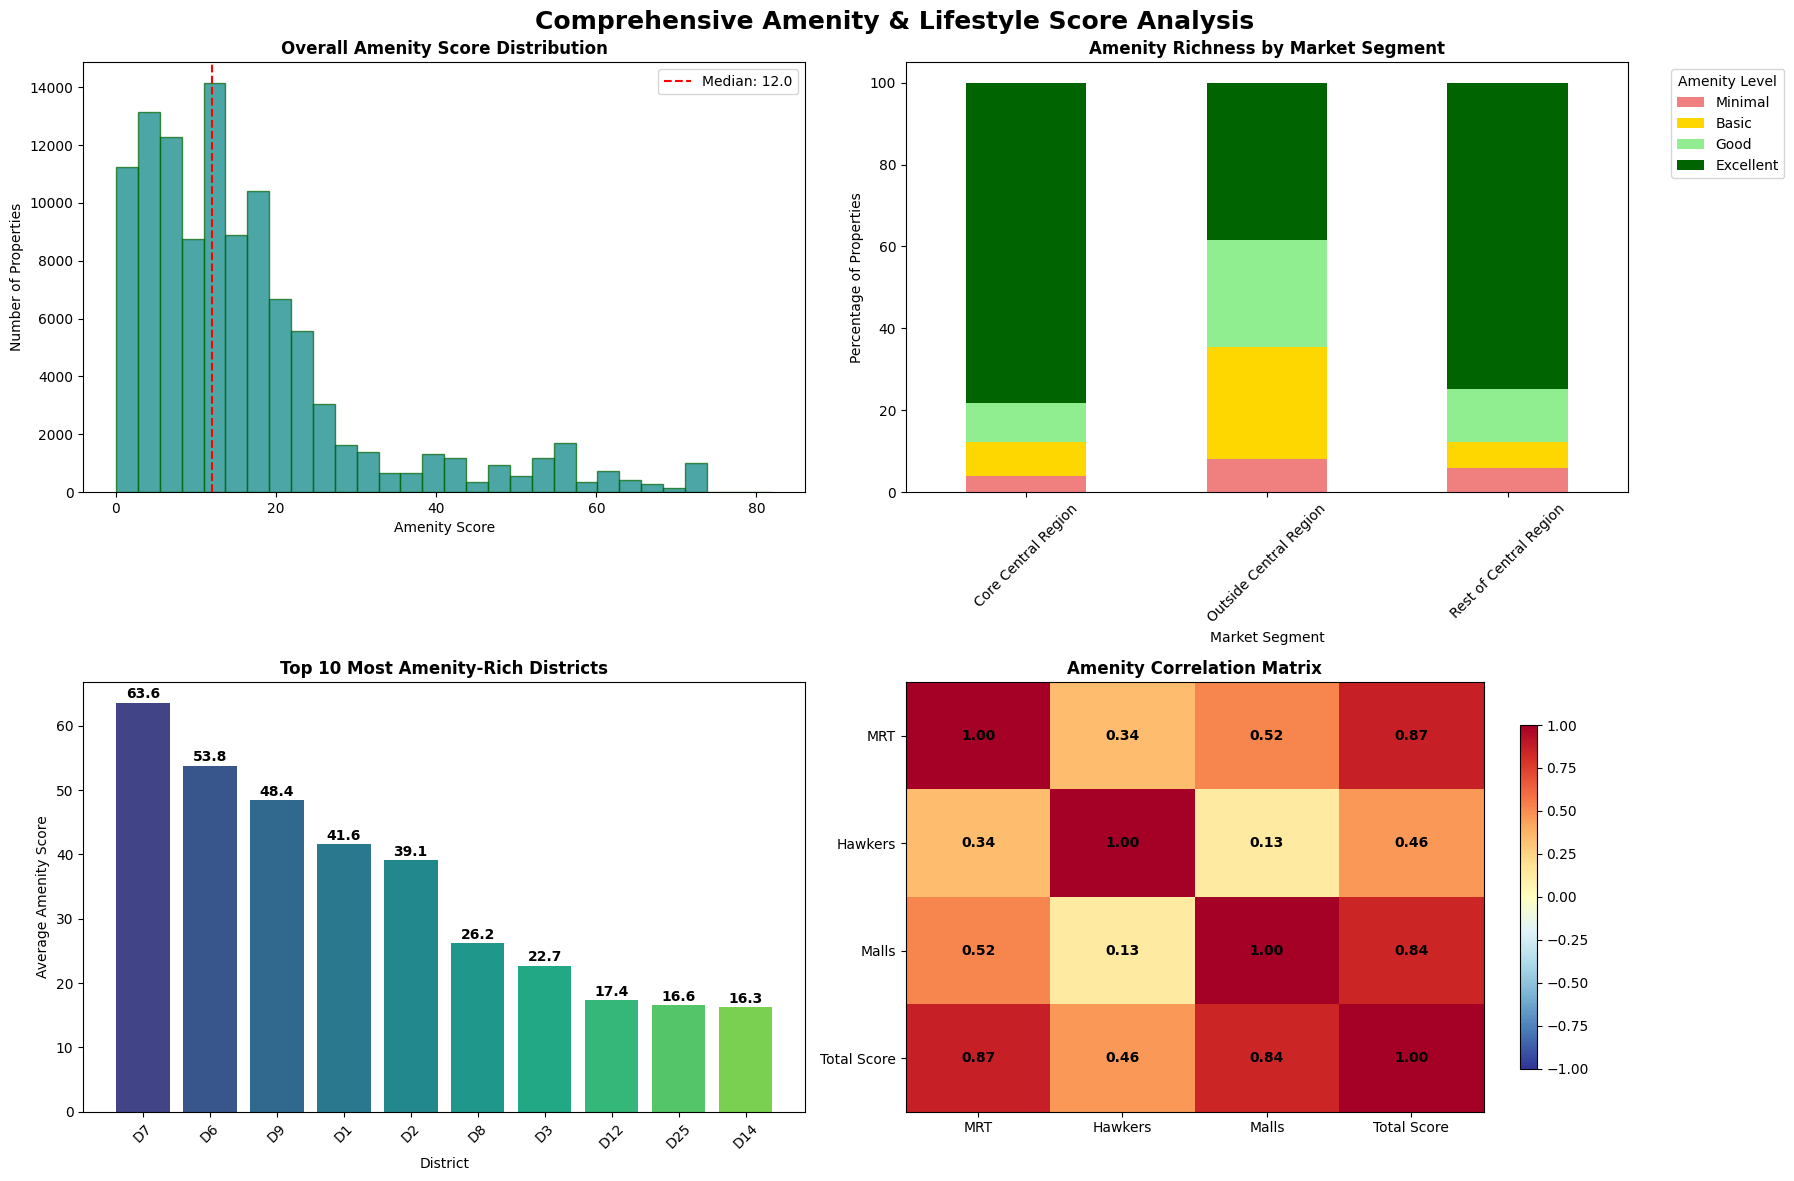

In [24]:
def create_amenity_dashboard(df):
    """Create comprehensive amenity scoring dashboard"""
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('Comprehensive Amenity & Lifestyle Score Analysis', fontsize=18, fontweight='bold')
    
    # 1. Amenity Score Distribution
    axes[0,0].hist(df['Amenity_Score'], bins=30, alpha=0.7, color='teal', edgecolor='darkgreen')
    axes[0,0].axvline(df['Amenity_Score'].median(), color='red', linestyle='--', 
                      label=f'Median: {df["Amenity_Score"].median():.1f}')
    axes[0,0].set_title('Overall Amenity Score Distribution', fontweight='bold')
    axes[0,0].set_xlabel('Amenity Score')
    axes[0,0].set_ylabel('Number of Properties')
    axes[0,0].legend()
    
    # 2. Amenity Richness by Market Segment
    segment_amenity = df.groupby(['Market Segment', 'Amenity_Richness']).size().unstack(fill_value=0)
    segment_amenity_pct = segment_amenity.div(segment_amenity.sum(axis=1), axis=0) * 100
    
    segment_amenity_pct.plot(kind='bar', stacked=True, ax=axes[0,1], 
                           color=['lightcoral', 'gold', 'lightgreen', 'darkgreen'])
    axes[0,1].set_title('Amenity Richness by Market Segment', fontweight='bold')
    axes[0,1].set_xlabel('Market Segment')
    axes[0,1].set_ylabel('Percentage of Properties')
    axes[0,1].legend(title='Amenity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # 3. Top Amenity-Rich Districts
    district_amenity = df.groupby('Postal District').agg({
        'Amenity_Score': ['mean', 'count'],
        'MRT_Count': 'mean',
        'Hawker_Count': 'mean',
        'Mall_Count': 'mean'
    }).round(1)
    
    district_amenity.columns = ['Amenity_Score', 'Property_Count', 'MRT_Avg', 'Hawker_Avg', 'Mall_Avg']
    district_amenity = district_amenity[district_amenity['Property_Count'] >= 5]
    top_amenity_districts = district_amenity.nlargest(10, 'Amenity_Score')
    
    bars = axes[1,0].bar(range(len(top_amenity_districts)), top_amenity_districts['Amenity_Score'], 
                         color=plt.cm.viridis(np.linspace(0.2, 0.8, len(top_amenity_districts))))
    axes[1,0].set_title('Top 10 Most Amenity-Rich Districts', fontweight='bold')
    axes[1,0].set_xlabel('District')
    axes[1,0].set_ylabel('Average Amenity Score')
    axes[1,0].set_xticks(range(len(top_amenity_districts)))
    axes[1,0].set_xticklabels([f'D{int(d)}' for d in top_amenity_districts.index], rotation=45)
    
    # Add value labels
    for bar, value in zip(bars, top_amenity_districts['Amenity_Score']):
        axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                       f'{value:.1f}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Amenity Correlation Matrix
    amenity_corr = df[['MRT_Count', 'Hawker_Count', 'Mall_Count', 'Amenity_Score']].corr()
    
    im = axes[1,1].imshow(amenity_corr, cmap='RdYlBu_r', aspect='auto', vmin=-1, vmax=1)
    axes[1,1].set_title('Amenity Correlation Matrix', fontweight='bold')
    
    # Add correlation values
    for i in range(len(amenity_corr)):
        for j in range(len(amenity_corr.columns)):
            text = axes[1,1].text(j, i, f'{amenity_corr.iloc[i, j]:.2f}',
                                 ha="center", va="center", color="black", fontweight='bold')
    
    axes[1,1].set_xticks(range(len(amenity_corr.columns)))
    axes[1,1].set_yticks(range(len(amenity_corr.columns)))
    axes[1,1].set_xticklabels(['MRT', 'Hawkers', 'Malls', 'Total Score'])
    axes[1,1].set_yticklabels(['MRT', 'Hawkers', 'Malls', 'Total Score'])
    
    plt.colorbar(im, ax=axes[1,1], shrink=0.8)
    
    plt.tight_layout()
    plt.show()
    
    return top_amenity_districts

# Create amenity dashboard
top_districts = create_amenity_dashboard(df_amenity)

In [25]:
df

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Street Name,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),...,Tenure,Postal District,Market Segment,Floor Level,Latitude,Longitude,Full Address,Nearest MRT Stations,Nearby Hawker Centers,Shopping Malls Within Radius of 1km
0,ONE MARINA GARDENS,"1,883,403",656.6,"2,868",Sep-25,MARINA GARDENS LANE,New Sale,Strata,61.0,"30,875",...,99 yrs lease commencing from 2023,1.0,Rest of Central Region,01 to 05,1.275801,103.862936,3 MARINA GARDENS LANE ONE MARINA GARDENS (U/C)...,MARINA SOUTH MRT STATION; MARINA SOUTH PIER MR...,NaN,NaN
1,ONE MARINA GARDENS,"2,055,683",656.6,"3,131",Sep-25,MARINA GARDENS LANE,New Sale,Strata,61.0,"33,700",...,99 yrs lease commencing from 2023,1.0,Rest of Central Region,36 to 40,1.275801,103.862936,3 MARINA GARDENS LANE ONE MARINA GARDENS (U/C)...,MARINA SOUTH MRT STATION; MARINA SOUTH PIER MR...,NaN,NaN
2,MARINA BAY RESIDENCES,"1,755,000",731.95,"2,398",Sep-25,MARINA BOULEVARD,Resale,Strata,68.0,"25,809",...,99 yrs lease commencing from 2005,1.0,Core Central Region,21 to 25,1.279626,103.854987,18 MARINA BOULEVARD MARINA BAY RESIDENCES SING...,DOWNTOWN MRT STATION; MARINA BAY MRT STATION; ...,Amoy Street Food Centre (Telok Ayer Food Centr...,Marina Bay Sands; The Shoppes at Marina Bay Sa...
3,ONE MARINA GARDENS,"2,038,262",667.37,"3,054",Sep-25,MARINA GARDENS LANE,New Sale,Strata,62.0,"32,875",...,99 yrs lease commencing from 2023,1.0,Rest of Central Region,26 to 30,1.275801,103.862936,3 MARINA GARDENS LANE ONE MARINA GARDENS (U/C)...,MARINA SOUTH MRT STATION; MARINA SOUTH PIER MR...,NaN,NaN
4,MARINA ONE RESIDENCES,"4,260,000","2,249.68","1,894",Sep-25,MARINA WAY,Resale,Strata,209.0,"20,383",...,99 yrs lease commencing from 2011,1.0,Core Central Region,01 to 05,1.277224,103.853695,23 MARINA WAY MARINA ONE RESIDENCES SINGAPORE ...,MARINA BAY MRT STATION; MARINA BAY MRT STATION...,Amoy Street Food Centre (Telok Ayer Food Centr...,The Shoppes at Marina Bay Sands; Marina Bay Li...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108663,RIVERTREES RESIDENCES,"623,500",505.91,"1,232",Sep-20,FERNVALE CLOSE,Resale,Strata,47.0,"13,266",...,99 yrs lease commencing from 2013,28.0,Outside Central Region,11 to 15,1.394109,103.880831,23 FERNVALE CLOSE RIVERTREES RESIDENCES SINGAP...,LAYAR LRT STATION; KUPANG LRT STATION; FERNVAL...,Fernvale Hawker Centre & Market; Anchorvale Vi...,The Seletar Mall
108664,SUNRISE GARDENS,"955,000","1,313.21",727,Sep-20,SUNRISE AVENUE,Resale,Strata,122.0,"7,828",...,99 yrs lease commencing from 1995,28.0,Outside Central Region,01 to 05,1.389691,103.857170,53 SUNRISE AVENUE SUNRISE GARDENS SINGAPORE 80...,NaN,NaN,NaN
108665,RIVERBANK @ FERNVALE,"1,258,888","1,044.11","1,206",Sep-20,FERNVALE CLOSE,Resale,Strata,97.0,"12,978",...,99 yrs lease commencing from 2013,28.0,Outside Central Region,16 to 20,1.395001,103.881565,15 FERNVALE CLOSE RIVERBANK @ FERNVALE SINGAPO...,KUPANG LRT STATION; LAYAR LRT STATION; FERNVAL...,Fernvale Hawker Centre & Market; Anchorvale Vi...,The Seletar Mall
108666,HIGH PARK RESIDENCES,"826,000",667.37,"1,238",Sep-20,FERNVALE ROAD,Resale,Strata,62.0,"13,323",...,99 yrs lease commencing from 2014,28.0,Outside Central Region,16 to 20,1.395337,103.874460,31 FERNVALE ROAD HIGH PARK RESIDENCES SINGAPOR...,THANGGAM LRT STATION; FERNVALE LRT STATION; LA...,Fernvale Hawker Centre & Market,The Seletar Mall


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set styling
plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (16, 10)

def clean_and_prepare_data(df):
    """Clean and prepare data with proper type handling"""
    
    print("🧹 Cleaning and preparing data...")
    df_clean = df.copy()
    
    # Clean price columns - handle commas and convert to numeric
    price_cols = ['Transacted Price ($)', 'Unit Price ($ PSF)', 'Area (SQFT)']
    for col in price_cols:
        if col in df_clean.columns:
            # Convert to string first, then clean
            df_clean[col] = df_clean[col].astype(str)
            df_clean[col] = df_clean[col].str.replace(',', '')
            df_clean[col] = df_clean[col].str.replace('$', '')
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    # Clean postal district
    df_clean['Postal District'] = pd.to_numeric(df_clean['Postal District'], errors='coerce')
    
    # Calculate amenity counts safely
    def safe_count_amenities(text):
        if pd.isna(text) or text == '' or text == 'nan':
            return 0
        try:
            return len([s.strip() for s in str(text).split(';') if s.strip() and s.strip() != ''])
        except:
            return 0
    
    df_clean['MRT_Count'] = df_clean['Nearest MRT Stations'].apply(safe_count_amenities)
    df_clean['Hawker_Count'] = df_clean['Nearby Hawker Centers'].apply(safe_count_amenities)
    df_clean['Mall_Count'] = df_clean['Shopping Malls Within Radius of 1km'].apply(safe_count_amenities)
    
    # Remove rows with invalid postal districts
    df_clean = df_clean.dropna(subset=['Postal District'])
    df_clean = df_clean[df_clean['Postal District'] > 0]
    
    print(f"✅ Data cleaned. Shape: {df_clean.shape}")
    return df_clean

def prepare_district_summary(df_clean):
    """Prepare district-level summary statistics"""
    
    print("📊 Calculating district statistics...")
    
    # Calculate district-level metrics
    district_summary = df_clean.groupby('Postal District').agg({
        'MRT_Count': ['mean', 'max'],
        'Hawker_Count': ['mean', 'max'], 
        'Mall_Count': ['mean', 'max'],
        'Unit Price ($ PSF)': ['mean', 'median'],
        'Transacted Price ($)': ['mean', 'count'],
        'Area (SQFT)': 'mean'
    }).round(2)
    
    # Flatten column names
    district_summary.columns = [
        'MRT_Avg', 'MRT_Max',
        'Hawker_Avg', 'Hawker_Max',
        'Mall_Avg', 'Mall_Max', 
        'PSF_Avg', 'PSF_Median',
        'Price_Avg', 'Sales_Count',
        'Size_Avg'
    ]
    
    # Calculate new sale percentage safely
    new_sale_pct = df_clean.groupby('Postal District')['Type of Sale'].apply(
        lambda x: (x == 'New Sale').sum() / len(x) * 100 if len(x) > 0 else 0
    ).round(1)
    
    district_summary['New_Sale_Pct'] = new_sale_pct
    
    # Count unique projects
    project_counts = df_clean.groupby('Postal District')['Project Name'].nunique()
    district_summary['Projects_Count'] = project_counts
    
    # Create demographic scores
    district_summary['Young_Professional_Score'] = (
        district_summary['MRT_Avg'] * 0.4 +
        district_summary['Mall_Avg'] * 0.3 +
        district_summary['Hawker_Avg'] * 0.3
    ).round(2)
    
    district_summary['Family_Score'] = (
        district_summary['MRT_Avg'] * 0.3 +
        district_summary['Hawker_Avg'] * 0.4 +
        district_summary['Mall_Avg'] * 0.3
    ).round(2)
    
    district_summary['Retiree_Score'] = (
        district_summary['MRT_Avg'] * 0.2 +
        district_summary['Hawker_Avg'] * 0.5 +
        district_summary['Mall_Avg'] * 0.3
    ).round(2)
    
    district_summary['Overall_Amenity_Score'] = (
        district_summary['MRT_Avg'] * 0.35 +
        district_summary['Hawker_Avg'] * 0.35 +
        district_summary['Mall_Avg'] * 0.3
    ).round(2)
    
    district_summary = district_summary.reset_index()
    
    print(f"✅ District summary prepared. {len(district_summary)} districts analyzed.")
    return district_summary

# Clean and prepare data
df_clean = clean_and_prepare_data(df)
district_data = prepare_district_summary(df_clean)

🧹 Cleaning and preparing data...
✅ Data cleaned. Shape: (108668, 26)
📊 Calculating district statistics...
✅ District summary prepared. 27 districts analyzed.


🏆 Creating top 10 district rankings...


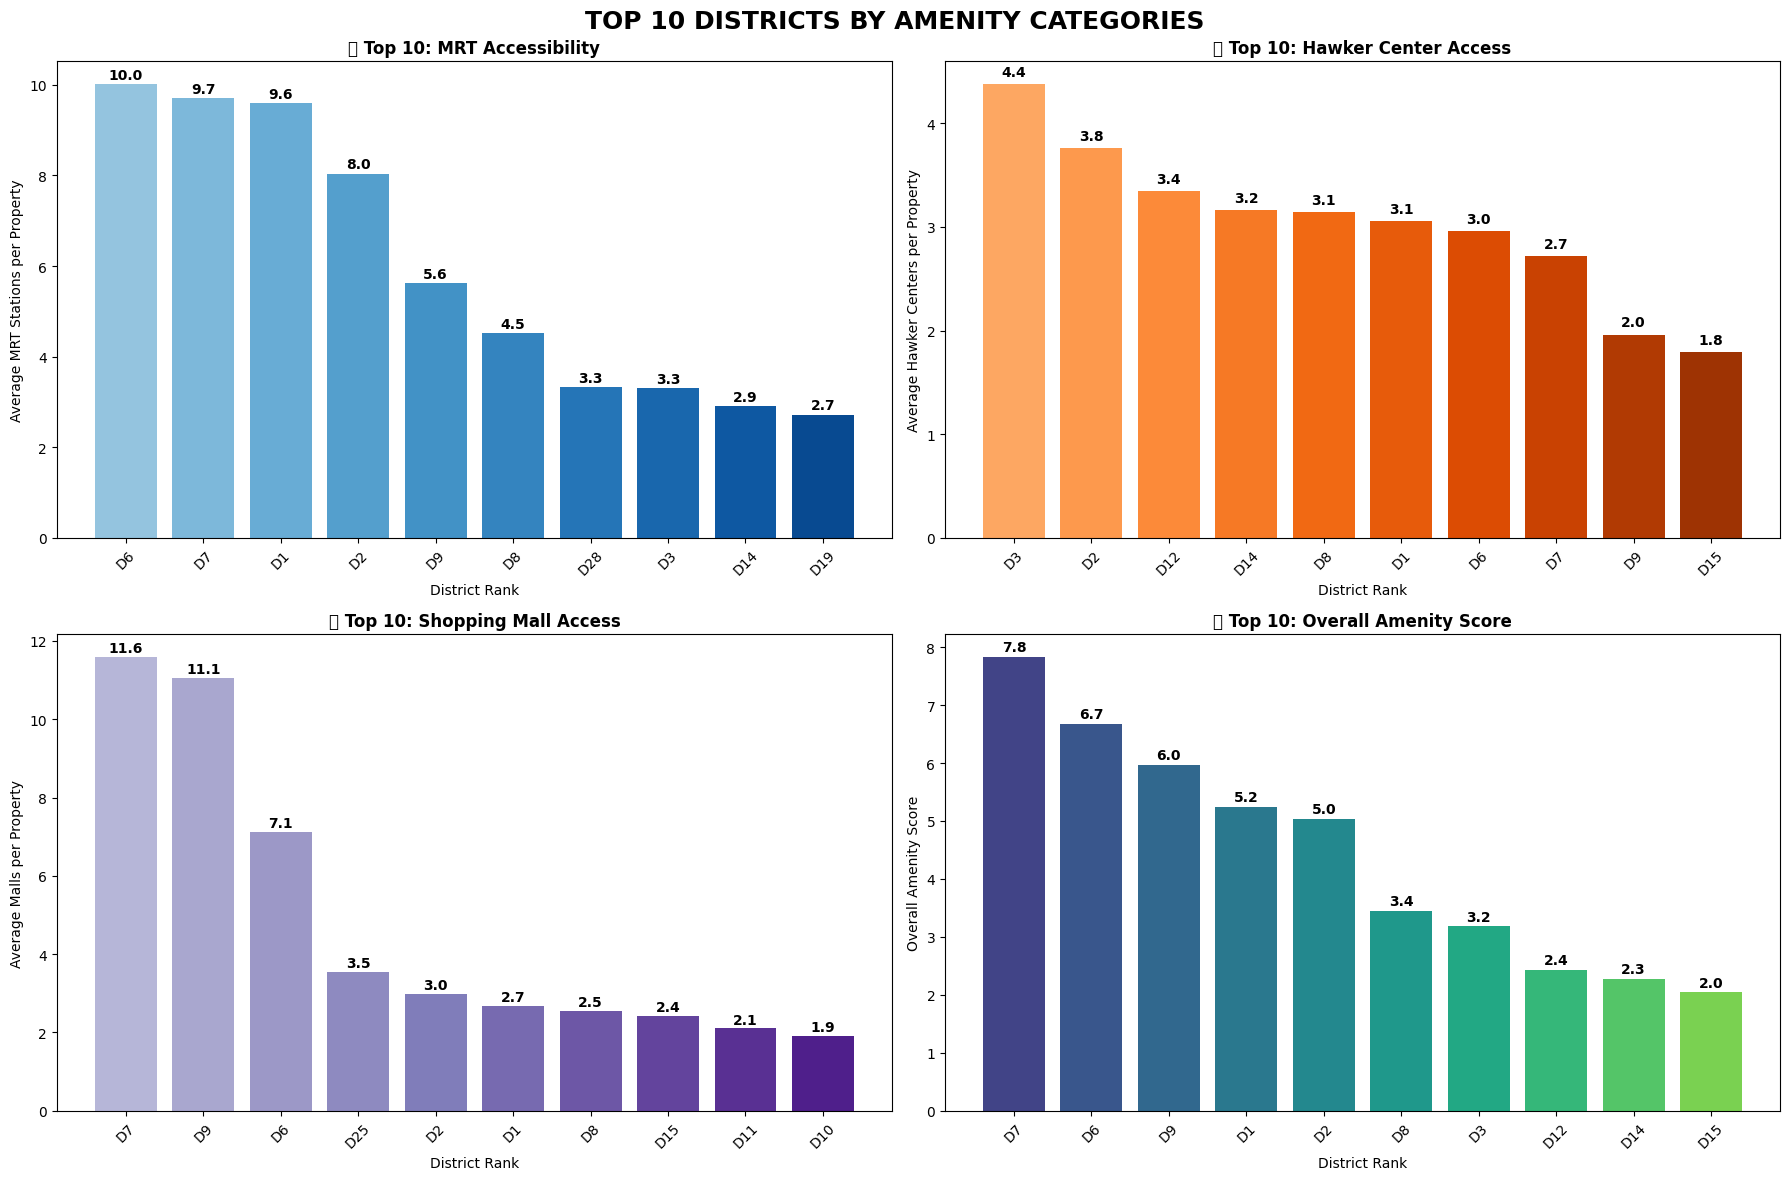

In [28]:
def create_top10_rankings(district_data):
    """Create top 10 rankings with error handling"""
    
    # Filter districts with meaningful data (at least 5 sales)
    significant_districts = district_data[district_data['Sales_Count'] >= 5].copy()
    
    if len(significant_districts) == 0:
        print("❌ No districts with sufficient sales data found.")
        return None
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('TOP 10 DISTRICTS BY AMENITY CATEGORIES', fontsize=18, fontweight='bold')
    
    # 1. Top 10 by MRT Accessibility
    top_mrt = significant_districts.nlargest(10, 'MRT_Avg')
    
    bars1 = axes[0,0].bar(range(len(top_mrt)), top_mrt['MRT_Avg'], 
                          color=plt.cm.Blues(np.linspace(0.4, 0.9, len(top_mrt))))
    axes[0,0].set_title('🚇 Top 10: MRT Accessibility', fontweight='bold')
    axes[0,0].set_xlabel('District Rank')
    axes[0,0].set_ylabel('Average MRT Stations per Property')
    axes[0,0].set_xticks(range(len(top_mrt)))
    axes[0,0].set_xticklabels([f'D{int(d)}' for d in top_mrt['Postal District']], rotation=45)
    
    # Add value labels
    for i, (bar, value) in enumerate(zip(bars1, top_mrt['MRT_Avg'])):
        axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                       f'{value:.1f}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Top 10 by Hawker Centers
    top_hawker = significant_districts.nlargest(10, 'Hawker_Avg')
    
    bars2 = axes[0,1].bar(range(len(top_hawker)), top_hawker['Hawker_Avg'],
                          color=plt.cm.Oranges(np.linspace(0.4, 0.9, len(top_hawker))))
    axes[0,1].set_title('🍜 Top 10: Hawker Center Access', fontweight='bold')
    axes[0,1].set_xlabel('District Rank')
    axes[0,1].set_ylabel('Average Hawker Centers per Property')
    axes[0,1].set_xticks(range(len(top_hawker)))
    axes[0,1].set_xticklabels([f'D{int(d)}' for d in top_hawker['Postal District']], rotation=45)
    
    for i, (bar, value) in enumerate(zip(bars2, top_hawker['Hawker_Avg'])):
        axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                       f'{value:.1f}', ha='center', va='bottom', fontweight='bold')
    
    # 3. Top 10 by Shopping Malls
    top_mall = significant_districts.nlargest(10, 'Mall_Avg')
    
    bars3 = axes[1,0].bar(range(len(top_mall)), top_mall['Mall_Avg'],
                          color=plt.cm.Purples(np.linspace(0.4, 0.9, len(top_mall))))
    axes[1,0].set_title('🛍️ Top 10: Shopping Mall Access', fontweight='bold')
    axes[1,0].set_xlabel('District Rank')
    axes[1,0].set_ylabel('Average Malls per Property')
    axes[1,0].set_xticks(range(len(top_mall)))
    axes[1,0].set_xticklabels([f'D{int(d)}' for d in top_mall['Postal District']], rotation=45)
    
    for i, (bar, value) in enumerate(zip(bars3, top_mall['Mall_Avg'])):
        axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                       f'{value:.1f}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Overall Amenity Score
    top_overall = significant_districts.nlargest(10, 'Overall_Amenity_Score')
    
    bars4 = axes[1,1].bar(range(len(top_overall)), top_overall['Overall_Amenity_Score'],
                          color=plt.cm.viridis(np.linspace(0.2, 0.8, len(top_overall))))
    axes[1,1].set_title('🎯 Top 10: Overall Amenity Score', fontweight='bold')
    axes[1,1].set_xlabel('District Rank')
    axes[1,1].set_ylabel('Overall Amenity Score')
    axes[1,1].set_xticks(range(len(top_overall)))
    axes[1,1].set_xticklabels([f'D{int(d)}' for d in top_overall['Postal District']], rotation=45)
    
    for i, (bar, value) in enumerate(zip(bars4, top_overall['Overall_Amenity_Score'])):
        axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                       f'{value:.1f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return top_mrt, top_hawker, top_mall, top_overall

# Create rankings
print("🏆 Creating top 10 district rankings...")
rankings = create_top10_rankings(district_data)

In [48]:
import pandas as pd
import numpy as np

def create_district_price_csv(df):
    """Create a simple CSV with District and Average Price"""
    
    print("🔍 Creating District Price CSV...")
    
    # Clean the data
    df_clean = df.copy()
    
    # Clean Unit Price PSF column
    df_clean['Unit_Price_PSF_Clean'] = pd.to_numeric(
        df_clean['Unit Price ($ PSF)'].astype(str).str.replace(',', '').str.replace('$', ''), 
        errors='coerce'
    )
    
    # Clean Postal District column
    df_clean['Postal_District_Clean'] = pd.to_numeric(df_clean['Postal District'], errors='coerce')
    
    # Remove invalid data
    df_clean = df_clean.dropna(subset=['Unit_Price_PSF_Clean', 'Postal_District_Clean'])
    df_clean = df_clean[df_clean['Unit_Price_PSF_Clean'] > 0]
    df_clean = df_clean[df_clean['Postal_District_Clean'] > 0]
    
    # Calculate average price by district
    district_prices = df_clean.groupby('Postal_District_Clean')['Unit_Price_PSF_Clean'].mean().reset_index()
    
    # Rename columns and convert to proper data types
    district_prices.columns = ['Postal District', 'Avg Price']
    
    # Convert Postal District to integer and round Avg Price to 2 decimal places
    district_prices['Postal District'] = district_prices['Postal District'].astype(int)
    district_prices['Avg Price'] = district_prices['Avg Price'].round(2)
    
    # Sort by district number
    district_prices = district_prices.sort_values('Postal District')
    
    # Save to CSV
    district_prices.to_csv('district_average_prices.csv', index=False)
    
    print(f"✅ CSV created with {len(district_prices)} districts")
    print("📁 File saved as: district_average_prices.csv")
    
    # Display first few rows
    print("\n📊 Sample data:")
    print(district_prices.head(10).to_string(index=False))
    
    return district_prices

# Execute
district_price_data = create_district_price_csv(df)

🔍 Creating District Price CSV...
✅ CSV created with 27 districts
📁 File saved as: district_average_prices.csv

📊 Sample data:
 Postal District  Avg Price
               1    2430.83
               2    2233.32
               3    2231.35
               4    1867.21
               5    1796.14
               6    2951.61
               7    2467.07
               8    1756.75
               9    2534.54
              10    2465.35


# Average Price (SPF) of Each District

In [49]:
district_price_data

,Postal District,Avg Price
0,1,2430.83
1,2,2233.32
2,3,2231.35
3,4,1867.21
4,5,1796.14
5,6,2951.61
6,7,2467.07
7,8,1756.75
8,9,2534.54
9,10,2465.35


In [56]:
import pandas as pd
import numpy as np

def create_preliminary_amenity_analysis(df):
    """Approach 1: Average amenities per property by district - for preliminary analysis"""
    
    print("🔍 PRELIMINARY AMENITY ANALYSIS - APPROACH 1")
    print("="*60)
    
    df_clean = df.copy()
    
    # Clean postal district
    df_clean['Postal_District_Clean'] = pd.to_numeric(df_clean['Postal District'], errors='coerce')
    df_clean = df_clean.dropna(subset=['Postal_District_Clean'])
    
    # Count amenities for each property
    def count_amenities_in_text(text):
        if pd.isna(text) or text == '' or str(text).lower() == 'nan':
            return 0
        try:
            # Split by semicolon and count non-empty items
            items = [item.strip() for item in str(text).split(';') if item.strip()]
            return len(items)
        except:
            return 0
    
    print("📊 Counting amenities per property...")
    df_clean['MRT_Count'] = df_clean['Nearest MRT Stations'].apply(count_amenities_in_text)
    df_clean['Hawker_Count'] = df_clean['Nearby Hawker Centers'].apply(count_amenities_in_text)
    df_clean['Mall_Count'] = df_clean['Shopping Malls Within Radius of 1km'].apply(count_amenities_in_text)
    
    # Calculate average by district
    district_amenities = df_clean.groupby('Postal_District_Clean').agg({
        'MRT_Count': 'mean',
        'Hawker_Count': 'mean', 
        'Mall_Count': 'mean',
        'Postal_District_Clean': 'count'  # Property count
    }).round(2)
    
    # Rename columns for clarity
    district_amenities.columns = ['Avg_MRT', 'Avg_Hawker', 'Avg_Mall', 'Property_Count']
    district_amenities = district_amenities.reset_index()
    
    # Convert postal district to integer
    district_amenities['Postal_District_Clean'] = district_amenities['Postal_District_Clean'].astype(int)
    district_amenities = district_amenities.rename(columns={'Postal_District_Clean': 'Postal_District'})
    
    # Sort by district number
    district_amenities = district_amenities.sort_values('Postal_District')
    
    # Add simple total for quick comparison
    district_amenities['Total_Avg_Amenities'] = (
        district_amenities['Avg_MRT'] + 
        district_amenities['Avg_Hawker'] + 
        district_amenities['Avg_Mall']
    ).round(2)
    
    # Save to CSV
    district_amenities.to_csv('amenity_per_district.csv', index=False)
    
    print(f"✅ CSV created with {len(district_amenities)} districts")
    print("📁 File saved as: amenity_per_district.csv")
    
    # Display sample data
    print(f"\n📊 PRELIMINARY ANALYSIS RESULTS:")
    print(district_amenities.head(10).to_string(index=False))
    
    # Quick insights for preliminary analysis
    print(f"\n🔍 QUICK PRELIMINARY INSIGHTS:")
    print(f"• Districts analyzed: {len(district_amenities)}")
    print(f"• Total properties: {district_amenities['Property_Count'].sum():,}")
    print(f"• District with most MRT access: D{district_amenities.loc[district_amenities['Avg_MRT'].idxmax(), 'Postal_District']} ({district_amenities['Avg_MRT'].max():.2f} avg)")
    print(f"• District with most Hawker access: D{district_amenities.loc[district_amenities['Avg_Hawker'].idxmax(), 'Postal_District']} ({district_amenities['Avg_Hawker'].max():.2f} avg)")
    print(f"• District with most Mall access: D{district_amenities.loc[district_amenities['Avg_Mall'].idxmax(), 'Postal_District']} ({district_amenities['Avg_Mall'].max():.2f} avg)")
    print(f"• Highest total amenity access: D{district_amenities.loc[district_amenities['Total_Avg_Amenities'].idxmax(), 'Postal_District']} ({district_amenities['Total_Avg_Amenities'].max():.2f} total)")
    
    return district_amenities

# Execute preliminary analysis
amenity_per_district = create_preliminary_amenity_analysis(df)

🔍 PRELIMINARY AMENITY ANALYSIS - APPROACH 1
📊 Counting amenities per property...
✅ CSV created with 27 districts
📁 File saved as: amenity_per_district.csv

📊 PRELIMINARY ANALYSIS RESULTS:
 Postal_District  Avg_MRT  Avg_Hawker  Avg_Mall  Property_Count  Total_Avg_Amenities
               1     9.60        3.06      2.68            1638                15.34
               2     8.04        3.76      2.99            1233                14.79
               3     3.31        4.38      1.63            4888                 9.32
               4     1.24        1.34      0.34            2141                 2.92
               5     0.89        1.65      1.33            8654                 3.87
               6    10.02        2.96      7.11             712                20.09
               7     9.71        2.72     11.59            1363                24.02
               8     4.52        3.14      2.54            1481                10.20
               9     5.63        1.96     11.06

In [57]:
amenity_per_district

,Postal_District,Avg_MRT,Avg_Hawker,Avg_Mall,Property_Count,Total_Avg_Amenities
0,1,9.60,3.06,2.68,1638,15.34
1,2,8.04,3.76,2.99,1233,14.79
2,3,3.31,4.38,1.63,4888,9.32
3,4,1.24,1.34,0.34,2141,2.92
4,5,0.89,1.65,1.33,8654,3.87
5,6,10.02,2.96,7.11,712,20.09
6,7,9.71,2.72,11.59,1363,24.02
7,8,4.52,3.14,2.54,1481,10.20
8,9,5.63,1.96,11.06,5926,18.65
9,10,2.47,1.63,1.91,7127,6.01


🚀 CREATING COMPREHENSIVE AGE GROUP ANALYSIS
🔗 JOINING AMENITY AND PRICE DATA
✅ Combined dataset created with 27 districts

📊 SAMPLE OF COMBINED DATA:
 Postal_District  Avg_MRT  Avg_Hawker  Avg_Mall  Property_Count  Total_Avg_Amenities  Avg_Price
               1     9.60        3.06      2.68            1638                15.34    2430.83
               2     8.04        3.76      2.99            1233                14.79    2233.32
               3     3.31        4.38      1.63            4888                 9.32    2231.35
               4     1.24        1.34      0.34            2141                 2.92    1867.21
               5     0.89        1.65      1.33            8654                 3.87    1796.14

📁 Combined data saved as: district_amenities_prices_combined.csv

📈 CREATING AGE GROUP VISUALIZATIONS

👥 YOUNG ADULTS:
   Districts: [5, 22, 19, 18, 27]
   Data points: 5
   📊 District Data:
      D5: $1,796 | MRT:0.9 | Hawker:1.6 | Mall:1.3
      D18: $1,478 | MRT:1.0 | H

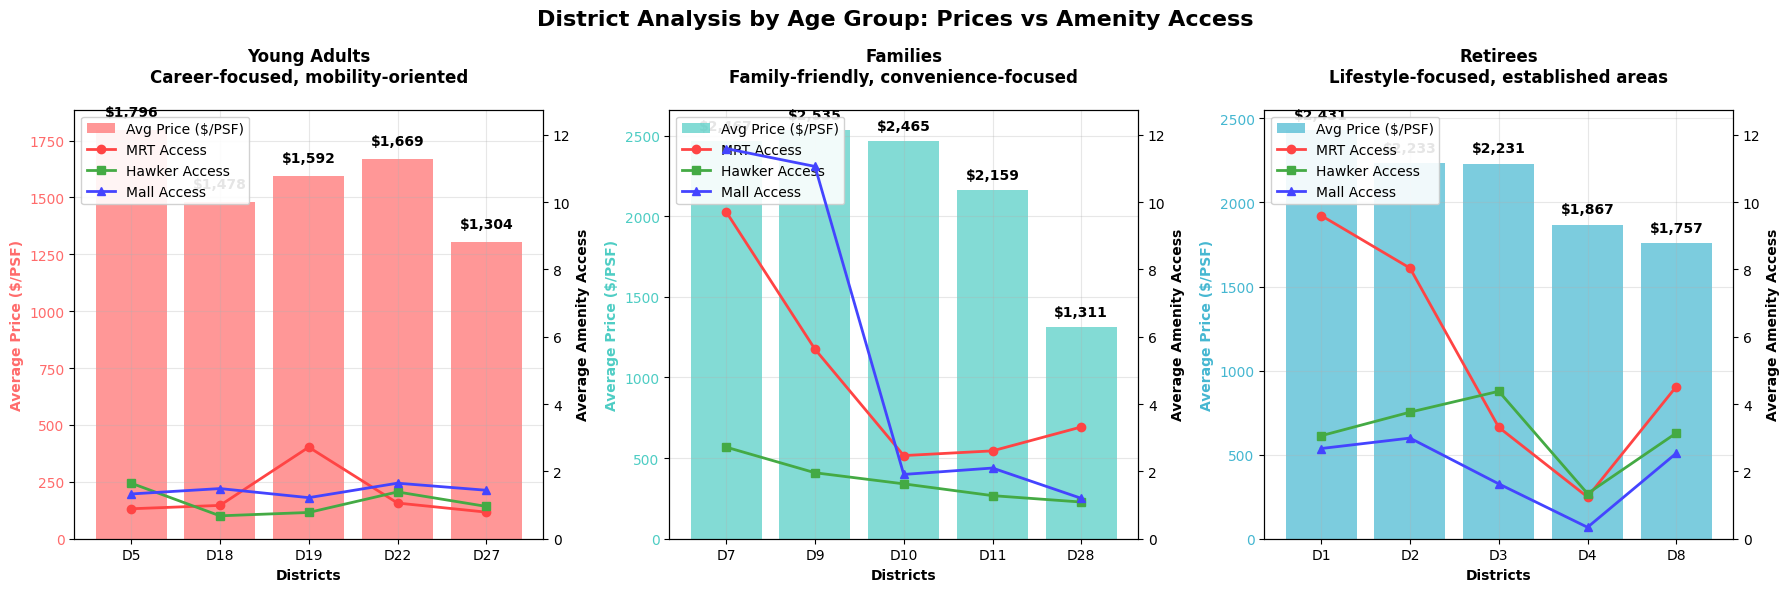


✅ Visualization saved as: age_group_district_analysis.png

💡 SUMMARY INSIGHTS BY AGE GROUP

🎯 YOUNG ADULTS:
   📍 Districts: [5, 22, 19, 18, 27]
   💰 Average Price Range: $1,304 - $1,796
   🚇 MRT Access Range: 0.8 - 2.7
   🍜 Hawker Access Range: 0.7 - 1.6
   🛍️ Mall Access Range: 1.2 - 1.6
   🏆 Best Value District: D19 (Price: $1,592, Total Amenities: 4.7)

🎯 FAMILIES:
   📍 Districts: [9, 7, 10, 11, 28]
   💰 Average Price Range: $1,311 - $2,535
   🚇 MRT Access Range: 2.5 - 9.7
   🍜 Hawker Access Range: 1.1 - 2.7
   🛍️ Mall Access Range: 1.2 - 11.6
   🏆 Best Value District: D7 (Price: $2,467, Total Amenities: 24.0)

🎯 RETIREES:
   📍 Districts: [1, 2, 8, 4, 3]
   💰 Average Price Range: $1,757 - $2,431
   🚇 MRT Access Range: 1.2 - 9.6
   🍜 Hawker Access Range: 1.3 - 4.4
   🛍️ Mall Access Range: 0.3 - 3.0
   🏆 Best Value District: D2 (Price: $2,233, Total Amenities: 14.8)

✅ COMPLETE ANALYSIS FINISHED!
📊 Check the generated graph: age_group_district_analysis.png
📁 Combined data available i

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_comprehensive_analysis_dataset():
    """Join amenity and price data for comprehensive analysis"""
    
    print("🔗 JOINING AMENITY AND PRICE DATA")
    print("="*50)
    
    # Load the amenity data (assuming it's already created as shown above)
    amenity_data = pd.DataFrame({
        'Postal_District': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28],
        'Avg_MRT': [9.60, 8.04, 3.31, 1.24, 0.89, 10.02, 9.71, 4.52, 5.63, 2.47, 2.61, 2.14, 1.92, 2.90, 1.95, 1.35, 0.00, 0.99, 2.72, 1.97, 1.05, 1.06, 2.61, 2.11, 1.06, 0.79, 3.32],
        'Avg_Hawker': [3.06, 3.76, 4.38, 1.34, 1.65, 2.96, 2.72, 3.14, 1.96, 1.63, 1.28, 3.35, 0.85, 3.16, 1.79, 1.73, 0.03, 0.68, 0.78, 1.63, 1.24, 1.39, 0.15, 0.69, 0.68, 0.96, 1.09],
        'Avg_Mall': [2.68, 2.99, 1.63, 0.34, 1.33, 7.11, 11.59, 2.54, 11.06, 1.91, 2.10, 1.70, 0.86, 0.52, 2.43, 0.28, 0.37, 1.49, 1.22, 1.18, 1.42, 1.65, 1.83, 3.54, 0.24, 1.44, 1.20],
        'Property_Count': [1638, 1233, 4888, 2141, 8654, 712, 1363, 1481, 5926, 7127, 2677, 3273, 2302, 5244, 9924, 4057, 2362, 7126, 9937, 2929, 5857, 2303, 5870, 953, 4334, 2800, 1557],
        'Total_Avg_Amenities': [15.34, 14.79, 9.32, 2.92, 3.87, 20.09, 24.02, 10.20, 18.65, 6.01, 5.99, 7.19, 3.63, 6.58, 6.17, 3.36, 0.40, 3.16, 4.72, 4.78, 3.71, 4.10, 4.59, 6.34, 1.98, 3.19, 5.61]
    })
    
    # Price data
    price_data = pd.DataFrame({
        'Postal_District': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28],
        'Avg_Price': [2430.83, 2233.32, 2231.35, 1867.21, 1796.14, 2951.61, 2467.07, 1756.75, 2534.54, 2465.35, 2159.48, 1859.85, 1835.87, 1598.27, 2061.58, 1441.01, 1246.32, 1477.88, 1592.33, 1706.99, 1951.02, 1669.26, 1481.49, 1373.12, 2058.44, 1304.41, 1311.05]
    })
    
    # Join the datasets
    combined_data = pd.merge(amenity_data, price_data, on='Postal_District', how='inner')
    
    print(f"✅ Combined dataset created with {len(combined_data)} districts")
    print("\n📊 SAMPLE OF COMBINED DATA:")
    print(combined_data.head().to_string(index=False))
    
    # Save combined dataset
    combined_data.to_csv('district_amenities_prices_combined.csv', index=False)
    print("\n📁 Combined data saved as: district_amenities_prices_combined.csv")
    
    return combined_data

def create_age_group_visualizations(combined_data):
    """Create 3 separate graphs for each age group"""
    
    print("\n📈 CREATING AGE GROUP VISUALIZATIONS")
    print("="*50)
    
    # Define age groups and their target districts
    age_groups = {
        'Young Adults': {
            'districts': [5, 22, 19, 18, 27],
            'color': '#FF6B6B',
            'description': 'Career-focused, mobility-oriented'
        },
        'Families': {
            'districts': [9, 7, 10, 11, 28],
            'color': '#4ECDC4', 
            'description': 'Family-friendly, convenience-focused'
        },
        'Retirees': {
            'districts': [1, 2, 8, 4, 3],
            'color': '#45B7D1',
            'description': 'Lifestyle-focused, established areas'
        }
    }
    
    # Create figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('District Analysis by Age Group: Prices vs Amenity Access', fontsize=16, fontweight='bold')
    
    for idx, (age_group, config) in enumerate(age_groups.items()):
        ax = axes[idx]
        
        # Filter data for this age group's districts
        group_data = combined_data[combined_data['Postal_District'].isin(config['districts'])].copy()
        group_data = group_data.sort_values('Postal_District')
        
        print(f"\n👥 {age_group.upper()}:")
        print(f"   Districts: {config['districts']}")
        print(f"   Data points: {len(group_data)}")
        
        if len(group_data) > 0:
            # Create district labels
            district_labels = [f"D{int(d)}" for d in group_data['Postal_District']]
            x_positions = range(len(district_labels))
            
            # Plot average price as bars
            bars = ax.bar(x_positions, group_data['Avg_Price'], 
                         color=config['color'], alpha=0.7, 
                         label='Avg Price ($/PSF)')
            
            # Create secondary y-axis for amenities
            ax2 = ax.twinx()
            
            # Plot amenity lines
            ax2.plot(x_positions, group_data['Avg_MRT'], 'o-', 
                    color='#FF4444', linewidth=2, markersize=6, label='MRT Access')
            ax2.plot(x_positions, group_data['Avg_Hawker'], 's-', 
                    color='#44AA44', linewidth=2, markersize=6, label='Hawker Access')
            ax2.plot(x_positions, group_data['Avg_Mall'], '^-', 
                    color='#4444FF', linewidth=2, markersize=6, label='Mall Access')
            
            # Customize primary axis (price)
            ax.set_xlabel('Districts', fontweight='bold')
            ax.set_ylabel('Average Price ($/PSF)', fontweight='bold', color=config['color'])
            ax.set_title(f'{age_group}\n{config["description"]}', fontweight='bold', pad=20)
            ax.set_xticks(x_positions)
            ax.set_xticklabels(district_labels)
            ax.grid(True, alpha=0.3)
            ax.tick_params(axis='y', labelcolor=config['color'])
            
            # Customize secondary axis (amenities)
            ax2.set_ylabel('Average Amenity Access', fontweight='bold')
            ax2.set_ylim(0, max(combined_data[['Avg_MRT', 'Avg_Hawker', 'Avg_Mall']].max()) * 1.1)
            
            # Add value labels on bars
            for bar, price in zip(bars, group_data['Avg_Price']):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 50,
                       f'${price:,.0f}', ha='center', va='bottom', fontweight='bold')
            
            # Add legends
            lines1, labels1 = ax.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left', framealpha=0.9)
            
            # Print data for this age group
            print("   📊 District Data:")
            for _, row in group_data.iterrows():
                print(f"      D{int(row['Postal_District'])}: ${row['Avg_Price']:,.0f} | MRT:{row['Avg_MRT']:.1f} | Hawker:{row['Avg_Hawker']:.1f} | Mall:{row['Avg_Mall']:.1f}")
        else:
            ax.text(0.5, 0.5, 'No data available', transform=ax.transAxes, 
                   ha='center', va='center', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('age_group_district_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n✅ Visualization saved as: age_group_district_analysis.png")

def create_summary_insights(combined_data):
    """Generate summary insights for each age group"""
    
    print(f"\n💡 SUMMARY INSIGHTS BY AGE GROUP")
    print("="*50)
    
    age_groups = {
        'Young Adults': [5, 22, 19, 18, 27],
        'Families': [9, 7, 10, 11, 28], 
        'Retirees': [1, 2, 8, 4, 3]
    }
    
    for age_group, districts in age_groups.items():
        group_data = combined_data[combined_data['Postal_District'].isin(districts)]
        
        if len(group_data) > 0:
            print(f"\n🎯 {age_group.upper()}:")
            print(f"   📍 Districts: {districts}")
            print(f"   💰 Average Price Range: ${group_data['Avg_Price'].min():,.0f} - ${group_data['Avg_Price'].max():,.0f}")
            print(f"   🚇 MRT Access Range: {group_data['Avg_MRT'].min():.1f} - {group_data['Avg_MRT'].max():.1f}")
            print(f"   🍜 Hawker Access Range: {group_data['Avg_Hawker'].min():.1f} - {group_data['Avg_Hawker'].max():.1f}")
            print(f"   🛍️ Mall Access Range: {group_data['Avg_Mall'].min():.1f} - {group_data['Avg_Mall'].max():.1f}")
            
            # Find best value district
            group_data['price_amenity_ratio'] = group_data['Avg_Price'] / (group_data['Total_Avg_Amenities'] + 1)
            best_value = group_data.loc[group_data['price_amenity_ratio'].idxmin()]
            print(f"   🏆 Best Value District: D{int(best_value['Postal_District'])} (Price: ${best_value['Avg_Price']:,.0f}, Total Amenities: {best_value['Total_Avg_Amenities']:.1f})")

# Execute the analysis
print("🚀 CREATING COMPREHENSIVE AGE GROUP ANALYSIS")
print("="*50)

# Create combined dataset
combined_data = create_comprehensive_analysis_dataset()

# Create visualizations
create_age_group_visualizations(combined_data)

# Generate insights
create_summary_insights(combined_data)

print(f"\n✅ COMPLETE ANALYSIS FINISHED!")
print("📊 Check the generated graph: age_group_district_analysis.png")
print("📁 Combined data available in: district_amenities_prices_combined.csv")

🚀 CREATING COMPREHENSIVE AGE GROUP ANALYSIS
🔗 JOINING AMENITY AND PRICE DATA
✅ Combined dataset created with 27 districts

📁 Combined data saved as: district_amenities_prices_combined.csv

📈 CREATING AGE GROUP VISUALIZATIONS


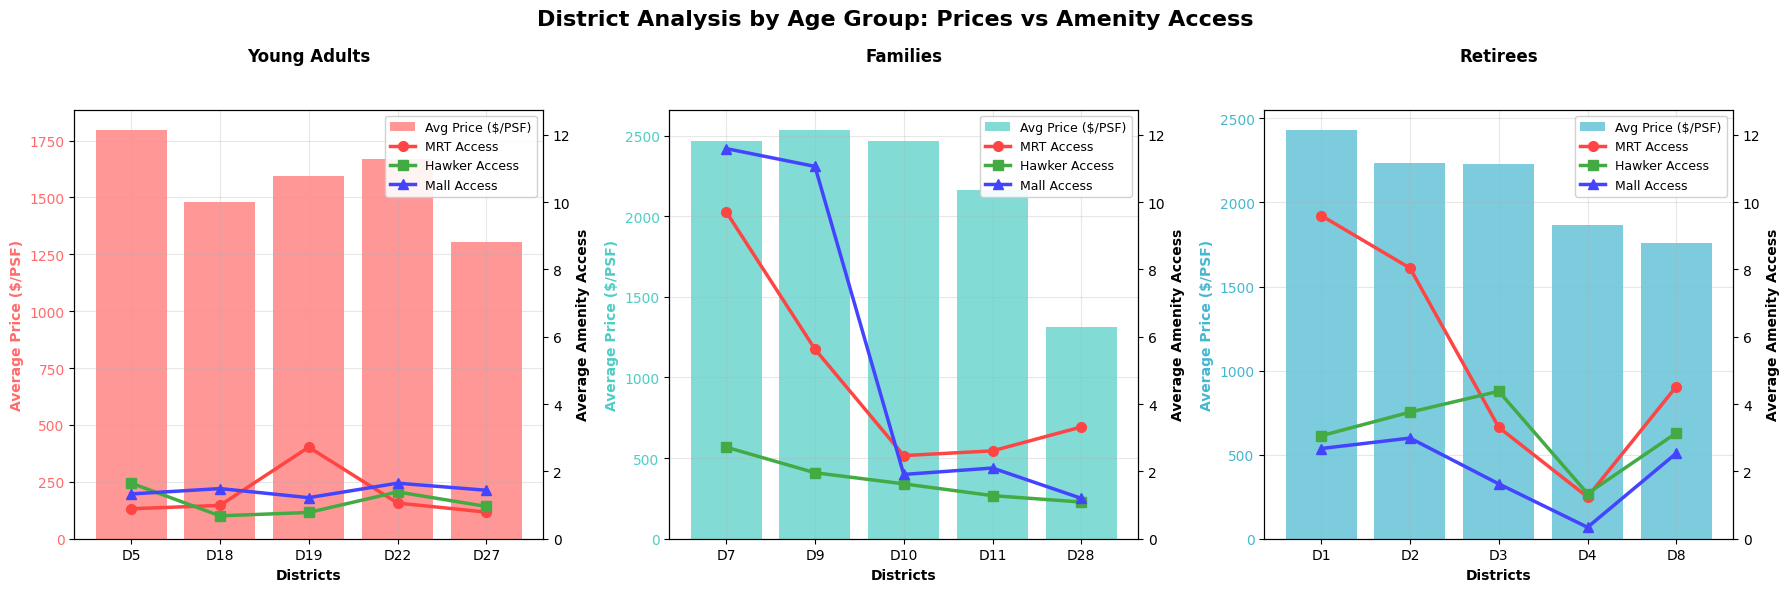


✅ Visualization saved as: age_group_district_analysis.png

💡 SUMMARY INSIGHTS BY AGE GROUP

🎯 YOUNG ADULTS:
   📍 Districts: [5, 22, 19, 18, 27]
   💰 Average Price Range: $1,304 - $1,796
   🚇 MRT Access Range: 0.8 - 2.7
   🍜 Hawker Access Range: 0.7 - 1.6
   🛍️ Mall Access Range: 1.2 - 1.6
   🏆 Best Value District: D19 (Price: $1,592, Total Amenities: 4.7)

🎯 FAMILIES:
   📍 Districts: [9, 10, 7, 11, 28]
   💰 Average Price Range: $1,311 - $2,535
   🚇 MRT Access Range: 2.5 - 9.7
   🍜 Hawker Access Range: 1.1 - 2.7
   🛍️ Mall Access Range: 1.2 - 11.6
   🏆 Best Value District: D7 (Price: $2,467, Total Amenities: 24.0)

🎯 RETIREES:
   📍 Districts: [1, 2, 8, 4, 3]
   💰 Average Price Range: $1,757 - $2,431
   🚇 MRT Access Range: 1.2 - 9.6
   🍜 Hawker Access Range: 1.3 - 4.4
   🛍️ Mall Access Range: 0.3 - 3.0
   🏆 Best Value District: D2 (Price: $2,233, Total Amenities: 14.8)

✅ COMPLETE ANALYSIS FINISHED!
📊 Check the generated graph: age_group_district_analysis.png
📁 Combined data available i

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_comprehensive_analysis_dataset():
    """Join amenity and price data for comprehensive analysis"""
    
    print("🔗 JOINING AMENITY AND PRICE DATA")
    print("="*50)
    
    # Load the amenity data (assuming it's already created as shown above)
    amenity_data = pd.DataFrame({
        'Postal_District': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28],
        'Avg_MRT': [9.60, 8.04, 3.31, 1.24, 0.89, 10.02, 9.71, 4.52, 5.63, 2.47, 2.61, 2.14, 1.92, 2.90, 1.95, 1.35, 0.00, 0.99, 2.72, 1.97, 1.05, 1.06, 2.61, 2.11, 1.06, 0.79, 3.32],
        'Avg_Hawker': [3.06, 3.76, 4.38, 1.34, 1.65, 2.96, 2.72, 3.14, 1.96, 1.63, 1.28, 3.35, 0.85, 3.16, 1.79, 1.73, 0.03, 0.68, 0.78, 1.63, 1.24, 1.39, 0.15, 0.69, 0.68, 0.96, 1.09],
        'Avg_Mall': [2.68, 2.99, 1.63, 0.34, 1.33, 7.11, 11.59, 2.54, 11.06, 1.91, 2.10, 1.70, 0.86, 0.52, 2.43, 0.28, 0.37, 1.49, 1.22, 1.18, 1.42, 1.65, 1.83, 3.54, 0.24, 1.44, 1.20],
        'Property_Count': [1638, 1233, 4888, 2141, 8654, 712, 1363, 1481, 5926, 7127, 2677, 3273, 2302, 5244, 9924, 4057, 2362, 7126, 9937, 2929, 5857, 2303, 5870, 953, 4334, 2800, 1557],
        'Total_Avg_Amenities': [15.34, 14.79, 9.32, 2.92, 3.87, 20.09, 24.02, 10.20, 18.65, 6.01, 5.99, 7.19, 3.63, 6.58, 6.17, 3.36, 0.40, 3.16, 4.72, 4.78, 3.71, 4.10, 4.59, 6.34, 1.98, 3.19, 5.61]
    })
    
    # Price data
    price_data = pd.DataFrame({
        'Postal_District': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28],
        'Avg_Price': [2430.83, 2233.32, 2231.35, 1867.21, 1796.14, 2951.61, 2467.07, 1756.75, 2534.54, 2465.35, 2159.48, 1859.85, 1835.87, 1598.27, 2061.58, 1441.01, 1246.32, 1477.88, 1592.33, 1706.99, 1951.02, 1669.26, 1481.49, 1373.12, 2058.44, 1304.41, 1311.05]
    })
    
    # Join the datasets
    combined_data = pd.merge(amenity_data, price_data, on='Postal_District', how='inner')
    
    print(f"✅ Combined dataset created with {len(combined_data)} districts")
    
    # Save combined dataset
    combined_data.to_csv('district_amenities_prices_combined.csv', index=False)
    print("\n📁 Combined data saved as: district_amenities_prices_combined.csv")
    
    return combined_data

def create_age_group_visualizations(combined_data):
    """Create 3 separate graphs for each age group"""
    
    print("\n📈 CREATING AGE GROUP VISUALIZATIONS")
    print("="*50)
    
    # Define age groups and their target districts
    age_groups = {

        'Young Adults': {
            'districts': [5, 22, 19, 18, 27],
            'color': '#FF6B6B',
            'description': ' '
        },
        'Families': {
            'districts': [9, 10, 7, 11, 28],
            'color': '#4ECDC4', 
            'description': ' '
        },
        'Retirees': {
            'districts': [1, 2, 8, 4, 3],
            'color': '#45B7D1',
            'description': ' '
        }
    }
    
    # Create figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('District Analysis by Age Group: Prices vs Amenity Access', fontsize=16, fontweight='bold')
    
    for idx, (age_group, config) in enumerate(age_groups.items()):
        ax = axes[idx]
        
        # Filter data for this age group's districts
        group_data = combined_data[combined_data['Postal_District'].isin(config['districts'])].copy()
        group_data = group_data.sort_values('Postal_District')
        
        if len(group_data) > 0:
            # Create district labels
            district_labels = [f"D{int(d)}" for d in group_data['Postal_District']]
            x_positions = range(len(district_labels))
            
            # Plot average price as bars
            bars = ax.bar(x_positions, group_data['Avg_Price'], 
                         color=config['color'], alpha=0.7, 
                         label='Avg Price ($/PSF)')
            
            # Create secondary y-axis for amenities
            ax2 = ax.twinx()
            
            # Plot amenity lines with cleaner styling
            ax2.plot(x_positions, group_data['Avg_MRT'], 'o-', 
                    color='#FF4444', linewidth=2.5, markersize=7, label='MRT Access')
            ax2.plot(x_positions, group_data['Avg_Hawker'], 's-', 
                    color='#44AA44', linewidth=2.5, markersize=7, label='Hawker Access')
            ax2.plot(x_positions, group_data['Avg_Mall'], '^-', 
                    color='#4444FF', linewidth=2.5, markersize=7, label='Mall Access')
            
            # Customize primary axis (price)
            ax.set_xlabel('Districts', fontweight='bold')
            ax.set_ylabel('Average Price ($/PSF)', fontweight='bold', color=config['color'])
            ax.set_title(f'{age_group}\n{config["description"]}', fontweight='bold', pad=20)
            ax.set_xticks(x_positions)
            ax.set_xticklabels(district_labels)
            ax.grid(True, alpha=0.3)
            ax.tick_params(axis='y', labelcolor=config['color'])
            
            # Customize secondary axis (amenities)
            ax2.set_ylabel('Average Amenity Access', fontweight='bold')
            ax2.set_ylim(0, max(combined_data[['Avg_MRT', 'Avg_Hawker', 'Avg_Mall']].max()) * 1.1)
            
            # Position legend in top right corner to avoid covering bars
            lines1, labels1 = ax.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax.legend(lines1 + lines2, labels1 + labels2, 
                     loc='upper right', framealpha=0.9, fontsize=9)
        else:
            ax.text(0.5, 0.5, 'No data available', transform=ax.transAxes, 
                   ha='center', va='center', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('age_group_district_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n✅ Visualization saved as: age_group_district_analysis.png")

def create_summary_insights(combined_data):
    """Generate summary insights for each age group"""
    
    print(f"\n💡 SUMMARY INSIGHTS BY AGE GROUP")
    print("="*50)
    
    age_groups = {
        'Young Adults': [5, 22, 19, 18, 27],
        'Families': [9, 10, 7, 11, 28], 
        'Retirees': [1, 2, 8, 4, 3]
    }
    
    for age_group, districts in age_groups.items():
        group_data = combined_data[combined_data['Postal_District'].isin(districts)]
        
        if len(group_data) > 0:
            print(f"\n🎯 {age_group.upper()}:")
            print(f"   📍 Districts: {districts}")
            print(f"   💰 Average Price Range: ${group_data['Avg_Price'].min():,.0f} - ${group_data['Avg_Price'].max():,.0f}")
            print(f"   🚇 MRT Access Range: {group_data['Avg_MRT'].min():.1f} - {group_data['Avg_MRT'].max():.1f}")
            print(f"   🍜 Hawker Access Range: {group_data['Avg_Hawker'].min():.1f} - {group_data['Avg_Hawker'].max():.1f}")
            print(f"   🛍️ Mall Access Range: {group_data['Avg_Mall'].min():.1f} - {group_data['Avg_Mall'].max():.1f}")
            
            # Find best value district
            group_data['price_amenity_ratio'] = group_data['Avg_Price'] / (group_data['Total_Avg_Amenities'] + 1)
            best_value = group_data.loc[group_data['price_amenity_ratio'].idxmin()]
            print(f"   🏆 Best Value District: D{int(best_value['Postal_District'])} (Price: ${best_value['Avg_Price']:,.0f}, Total Amenities: {best_value['Total_Avg_Amenities']:.1f})")

# Execute the analysis
print("🚀 CREATING COMPREHENSIVE AGE GROUP ANALYSIS")
print("="*50)

# Create combined dataset
combined_data = create_comprehensive_analysis_dataset()

# Create visualizations
create_age_group_visualizations(combined_data)

# Generate insights
create_summary_insights(combined_data)

print(f"\n✅ COMPLETE ANALYSIS FINISHED!")
print("📊 Check the generated graph: age_group_district_analysis.png")
print("📁 Combined data available in: district_amenities_prices_combined.csv")

